![Logo de l'entreprise](logo.png)



In [1]:
import pandas as pd
import math

### Importation des fichiers source

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd

# Je charge le fichier CSV contenant les données originales sur le bilan alimentaire de volaille.
donnees_originale = pd.read_csv('Données_originale.csv', encoding='utf8')

# Je charge le fichier CSV contenant les données standardisées sur la croissance de la population.
donnees_standardise = pd.read_csv('Données_standardisé.csv', encoding='utf8')


In [3]:
donnees_originale

Zone  Dispo_intérieur en Tonne  \
0              Afghanistan                   67000.0   
1           Afrique du Sud                 2067000.0   
2                  Algérie                  280000.0   
3                Allemagne                 1626000.0   
4                   Angola                  276000.0   
..                     ...                       ...   
142               Équateur                  333000.0   
143               Érythrée                   63200.0   
144  États-Unis d'Amérique                19451000.0   
145               Éthiopie                   68000.0   
146           Îles Salomon                    4000.0   

     Dispo_Alim_kcal_pers_jour_volaille  Dispo_Prot_g_pers_jour_volaille  \
0                                 5.980                            0.610   
1                               140.220                           13.780   
2                                22.040                            1.960   
3                                66.500                            7.530   
4                                28.190                            2.860   
..                                  ...                              ...   
142                              81.260                            6.010   
143                              75.592                            7.908   
144                             231.330                           20.940   
145                               1.990                            0.200   
146                              24.860                            2.390   

     Dispo_Alim_kg_pers_volaille  Population 2020  \
0                          1.710       38972230.0   
1                         34.860       58801927.0   
2                          6.380       43451666.0   
3                         18.340       83328988.0   
4                          8.410       33428486.0   
..                           ...              ...   
142                       18.880       17588595.0   
143                       22.776        3555868.0   
144                       58.690      335942003.0   
145                        0.590      117190911.0   
146                        6.140         691191.0   

     Evol Population 2010-2020 en %  PIB par habitant $  \
0                              38.3          519.290602   
1                              13.6         5693.514402   
2                              21.2         3323.081187   
3                               2.5        47365.644042   
4                              43.1         1672.709694   
..                              ...                 ...   
142                            17.3         5563.775304   
143                            13.0          582.711785   
144                             8.0        63303.834620   
145                            31.3          822.093009   
146                            27.9         2248.268293   

     Qté poulets exporté en nb de tete  Valeur exporté en $  \
0                                  0.0                  0.0   
1                              10900.0            9447000.0   
2                                  0.0                  0.0   
3                             256019.0          504633000.0   
4                                  0.0                  0.0   
..                                 ...                  ...   
142                                0.0                  0.0   
143                                0.0                  0.0   
144                            51896.0          227513000.0   
145                                0.0                  0.0   
146                               40.4              16000.0   

     Qté poulets importé en nb de tete  Valeur importé en $  \
0                              31341.0           10666000.0   
1                                431.0           11057000.0   
2                               5248.0           26988000.0   
3                             148774.0          167632000.0   
4                 

In [4]:
donnees_standardise

Dispo_intérieur en Tonne  Dispo_Alim_kcal_pers_jour_volaille  \
0                   -1.773034                            1.468643   
1                    1.214127                           -1.597877   
2                   -1.187409                            0.862568   
3                    8.417419                            6.904625   
4                   -1.717203                            0.601604   
..                        ...                                 ...   
142                 -0.325527                           -0.208604   
143                 -0.365784                           -0.450909   
144                  8.241359                           -4.156046   
145                 -1.934724                            1.091239   
146                 -1.574078                            0.707518   

     Dispo_Prot_g_pers_jour_volaille  Dispo_Alim_kg_pers_volaille  \
0                           0.248139                     1.039708   
1                          -0.125959                     0.090346   
2                           0.404565                    -0.139592   
3                           0.124041                     0.422658   
4                           0.141224                     1.449038   
..                               ...                          ...   
142                        -0.104119                    -0.163682   
143                        -0.509245                    -0.471022   
144                         6.143797                     1.778799   
145                         0.787671                     0.403506   
146                        -0.051145                     0.279315   

     Population 2020  Evol Population 2010-2020 en %  PIB par habitant $  \
0           0.051271                        0.111841            0.056579   
1          -0.779678                        0.014795           -0.281137   
2          -0.114021                        0.009816            0.194792   
3           0.684251                       -3.050274           -3.119679   
4           0.170074                       -0.086857           -0.085582   
..               ...                             ...                 ...   
142        -0.417011                        0.027904            0.207147   
143        -0.658175                       -0.076381           -0.184081   
144         1.952120                       -3.336688           -0.267480   
145         0.235796                        0.172951           -0.352985   
146         0.017442                       -0.272788           -0.008456   

     Qté poulets exporté en nb de tete  Valeur exporté en $  \
0                            -0.250077            -0.053840   
1                            -0.244868             0.166865   
2                            -0.164972            -0.100381   
3                             2.341463            -0.223387   
4                             0.009745             0.048737   
..                                 ...                  ...   
142                           0.001052            -0.052743   
143                          -0.026174            -0.051595   
144                          -2.972038             0.005014   
145                          -0.009322            -0.009396   
146                          -0.078428            -0.000661   

     Qté poulets importé en nb de tete  Valeur importé en $  \
0                             0.070314             0.490928   
1                             0.224388            -0.143103   
2                            -0.053226            -0.161277   
3                            -0.093187             0.209170   
4                             0.003236             0.006754   
..                                 ...                  ...   
142                          -0.175075            -0.090253   
143                           0.101453             0.000285   
144                           0.055443             0.009215   
145                          -0.017098         

Liste des différents nombres de clusters à tester.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

### Résumé de l'Analyse de Segmentation par KMeans

#### Utilisation du graphique du coude pour déterminer k
Le meilleur k selon le graphique du coude est 4.
#### Inertie et Score de Silhouette pour différentes valeurs de k
- k = 3 : Inertie = 980.7651372037121, Score de Silhouette = 0.3728443426023112
- k = 4 : Inertie = 759.9260999965386, Score de Silhouette = 0.37940164761871575
- k = 5 : Inertie = 667.4095104852902, Score de Silhouette = 0.40174441985451953
- k = 6 : Inertie = 577.9349907365631, Score de Silhouette = 0.3486908510350823
- k = 7 : Inertie = 509.67157337275506, Score de Silhouette = 0.40235829819127594
- k = 8 : Inertie = 434.5736958727504, Score de Silhouette = 0.3387102101720913
- k = 9 : Inertie = 379.3829902339934, Score de Silhouette = 0.33966445923947286
- k = 10 : Inertie = 335.09674237954823, Score de Silhouette = 0.342176453456385



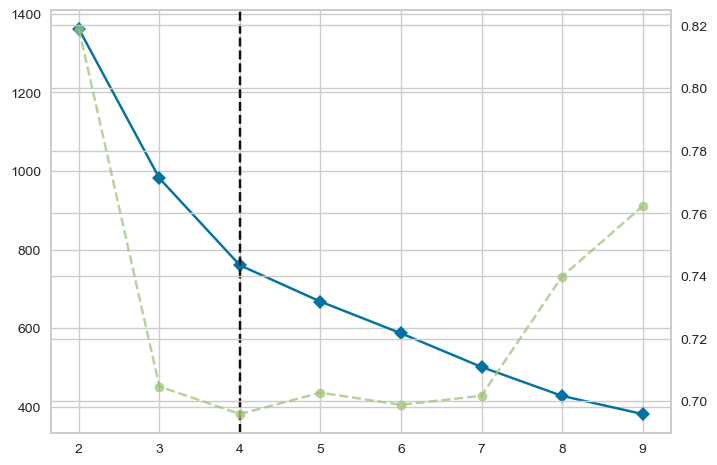

In [5]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Je charge la bibliothèque pour la standardisation des données.
from sklearn.preprocessing import StandardScaler



# Je définis la liste des différents nombres de clusters à tester.
valeurs_k = [3, 4, 5, 6, 7, 8, 9, 10]

# Je crée et ajuste le visualiseur du coude pour déterminer le nombre optimal de clusters (k).
visualiseur_coude = KElbowVisualizer(KMeans(n_init=10), k=(2, 10))
visualiseur_coude.fit(donnees_standardise)
meilleur_k = visualiseur_coude.elbow_value_

# Je commence à rédiger le texte de résumé pour l'analyse.
texte_resume = f"### Résumé de l'Analyse de Segmentation par KMeans\n\n"

# Je crée des dictionnaires pour stocker les valeurs d'inertie et les scores de silhouette pour chaque valeur de k.
valeurs_inertie = {}
valeurs_silhouette = {}

# Je boucle sur chaque valeur de k pour ajuster le modèle KMeans, calculer l'inertie et le score de silhouette.
for k in valeurs_k:
    modele_kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans_labels = modele_kmeans.fit_predict(donnees_standardise)
    valeurs_inertie[k] = modele_kmeans.inertia_
    valeurs_silhouette[k] = silhouette_score(donnees_standardise, kmeans_labels)

# J'ajoute les résultats au texte du résumé.
texte_resume += f"#### Utilisation du graphique du coude pour déterminer k\n"
texte_resume += f"Le meilleur k selon le graphique du coude est {meilleur_k}.\n"
texte_resume += f"#### Inertie et Score de Silhouette pour différentes valeurs de k\n"

for k in valeurs_k:
    texte_resume += f"- k = {k} : Inertie = {valeurs_inertie[k]}, Score de Silhouette = {valeurs_silhouette[k]}\n"

# J'affiche le texte du résumé.
print(texte_resume)


Segmentation Kmeans et graphique metrique Score silouette, cluster, boxplot

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

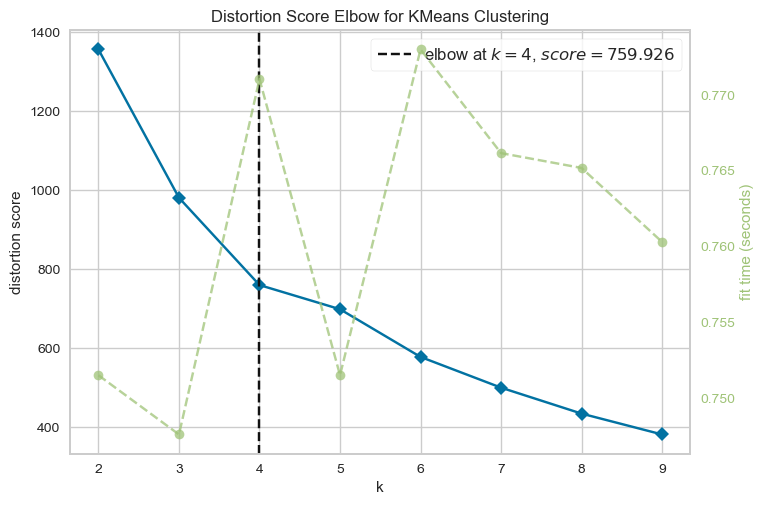

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


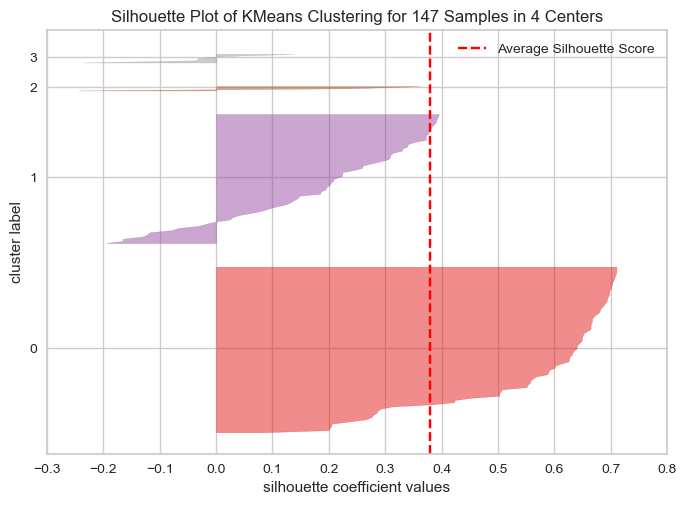

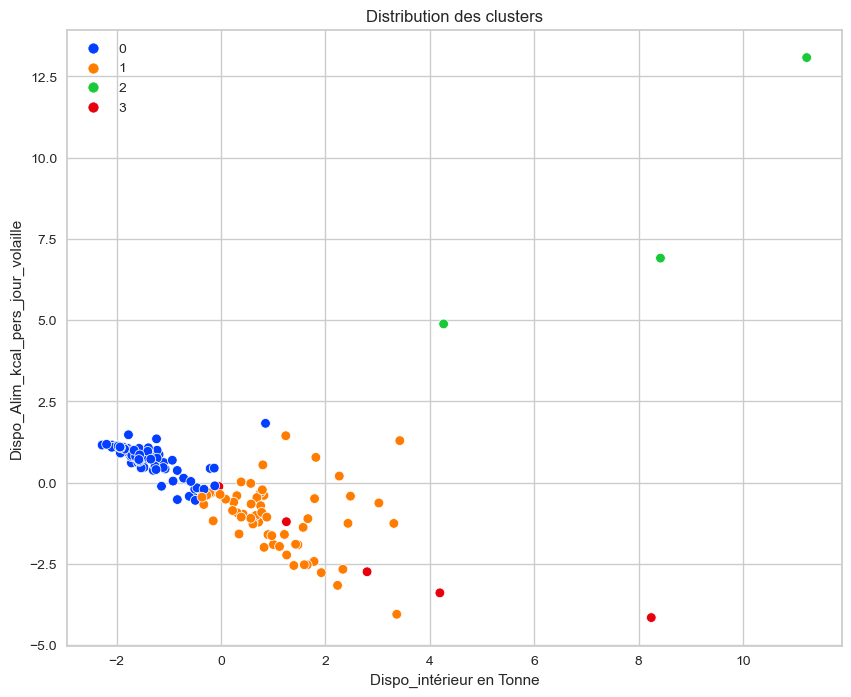

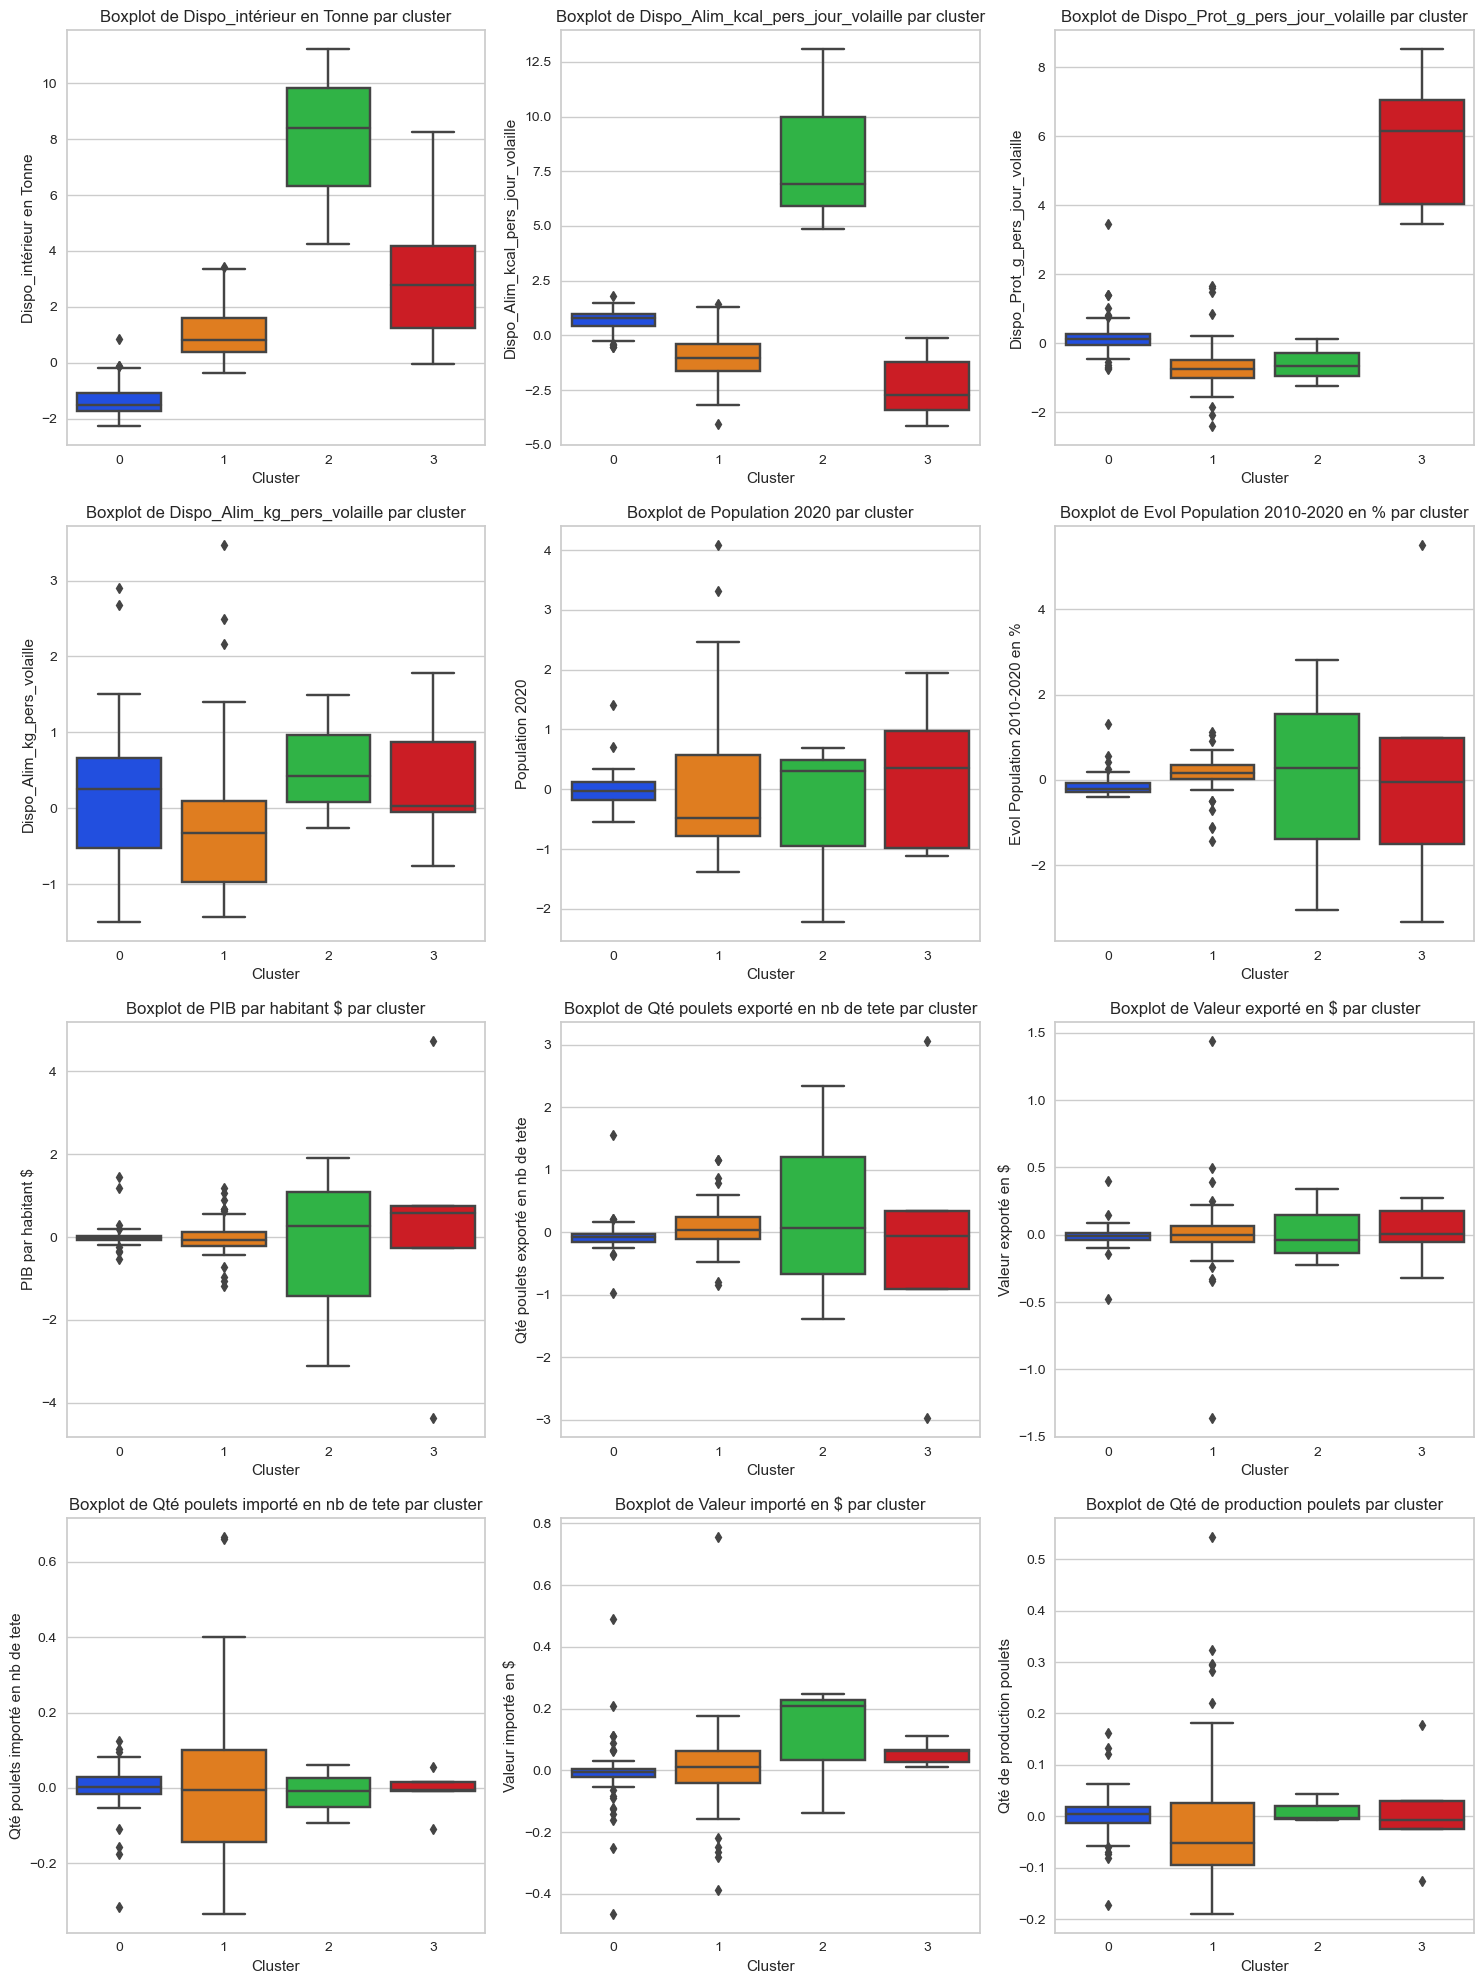

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Je limite le multithreading pour éviter des problèmes de performances
os.environ['OMP_NUM_THREADS'] = '1'

# Je supprime les colonnes non numériques pour le clustering, si nécessaire
donnees_numeriques = donnees_originale.select_dtypes(include=['number'])

# Je prépare le modèle KMeans pour la méthode du coude
modele_coude = KMeans(n_init=10, random_state=42)
visualisateur_coude = KElbowVisualizer(modele_coude, k=(2, 10))
visualisateur_coude.fit(donnees_standardise)
visualisateur_coude.show()

# Je configure le modèle KMeans avec le nombre optimal de clusters
modele_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
modele_kmeans.fit(donnees_standardise)

# Je crée un visualiseur de silhouette pour évaluer la qualité des clusters
visualisateur_silhouette = SilhouetteVisualizer(modele_kmeans)
visualisateur_silhouette.fit(donnees_standardise)
visualisateur_silhouette.show()

# Je prépare un DataFrame pour afficher les données et leurs clusters
df_kmeans = pd.DataFrame(donnees_standardise, columns=donnees_numeriques.columns)
df_kmeans['Cluster'] = modele_kmeans.labels_

# Je prépare les graphiques pour visualiser les clusters
palette_couleurs = sns.color_palette("bright", 4)


# Scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_kmeans.iloc[:, 0], y=df_kmeans.iloc[:, 1], hue=modele_kmeans.labels_, palette=palette_couleurs)
plt.title('Distribution des clusters')
plt.show()

# Je crée un boxplot pour chaque variable par cluster
fig, axs = plt.subplots(4, 3, figsize=(15, 20)) # Grid of 4x3
axs = axs.flatten() 
for i, column in enumerate(df_kmeans.columns):
    if column != 'Cluster':
        sns.boxplot(x='Cluster', y=column, data=df_kmeans, ax=axs[i], palette=palette_couleurs)
        axs[i].set_title(f'Boxplot de {column} par cluster')
plt.tight_layout()
plt.show()

Test d'anova sur différentes variable

In [7]:
import scipy.stats as stats

# Je crée une liste de groupes, chacun contenant les données d'un cluster spécifique
groupes = [df_kmeans[df_kmeans['Cluster'] == cluster] for cluster in set(df_kmeans['Cluster'])]

# Je boucle sur chaque colonne, en excluant la colonne 'Cluster'
for colonne in df_kmeans.columns[:-1]:
    # Je récupère les données pour chaque cluster pour cette colonne
    donnees = [groupe[colonne] for groupe in groupes]

    # J'applique le test d'ANOVA pour évaluer la différence entre les moyennes des clusters
    f_statistique, p_valeur = stats.f_oneway(*donnees)

    print(f"Variable {colonne}: F={f_statistique}, p={p_valeur}")


Variable Dispo_intérieur en Tonne: F=148.80864660116444, p=8.776620864770015e-44
Variable Dispo_Alim_kcal_pers_jour_volaille: F=124.2103041672225, p=1.221187149419095e-39
Variable Dispo_Prot_g_pers_jour_volaille: F=127.63473459958612, p=2.990770567179484e-40
Variable Dispo_Alim_kg_pers_volaille: F=2.9058322912573504, p=0.03687498284392061
Variable Population 2020: F=0.4140757692955849, p=0.7431474788995116
Variable Evol Population 2010-2020 en %: F=1.7906236445749328, p=0.15163806667229154
Variable PIB par habitant $: F=0.4789518257172112, p=0.6974295637935226
Variable Qté poulets exporté en nb de tete: F=1.5444250124114147, p=0.20564072004574865
Variable Valeur exporté en $: F=0.20700203501459571, p=0.8914192509622342
Variable Qté poulets importé en nb de tete: F=0.023063073634957656, p=0.9952361269282695
Variable Valeur importé en $: F=1.3143957567142968, p=0.2720936529254668
Variable Qté de production poulets: F=0.11038722621154438, p=0.9539152371772073


Graphiques des différents cluster et centroïde

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


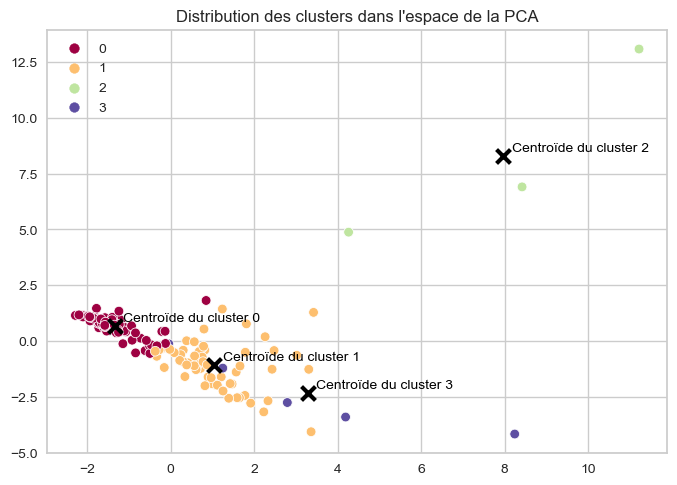

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Je standardise les données pour les préparer pour la PCA
normaliseur = StandardScaler()
donnees_normalisees = normaliseur.fit_transform(donnees_originale.select_dtypes(include=['number']))

# J'initialise et applique la PCA pour réduire les dimensions
pca = PCA()
composantes_principales = pca.fit_transform(donnees_normalisees)

# J'utilise KMeans pour créer 4 clusters
modele_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
modele_kmeans.fit(composantes_principales)  # J'utilise les composantes principales pour le clustering

# Je récupère les centroïdes des clusters
centroides = modele_kmeans.cluster_centers_

# Je crée une nouvelle figure pour la visualisation
plt.figure()

# Je définis une palette de couleurs
palette_couleurs = sns.color_palette("Spectral", as_cmap=True)

# Je trace les composantes principales et les labels de clusters
sns.scatterplot(x=composantes_principales[:, 0], y=composantes_principales[:, 1], hue=modele_kmeans.labels_, palette=palette_couleurs)

# Je trace et étiquette les centroïdes des clusters
for i in range(centroides.shape[0]):
    plt.scatter(centroides[i, 0], centroides[i, 1], marker='x', s=100, linewidths=3, color='black', zorder=10)
    plt.text(centroides[i, 0] + 0.2, centroides[i, 1] + 0.2, f'Centroïde du cluster {i}', fontsize=10, color='black')

plt.title('Distribution des clusters dans l\'espace de la PCA')
plt.show()


Heatmap simplifier kmeans

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\M710q\AppData\Local\Temp\ipykernel_10960\2645475683.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resume_cluster = donnees_originale.groupby('Cluster_KMeans').mean()


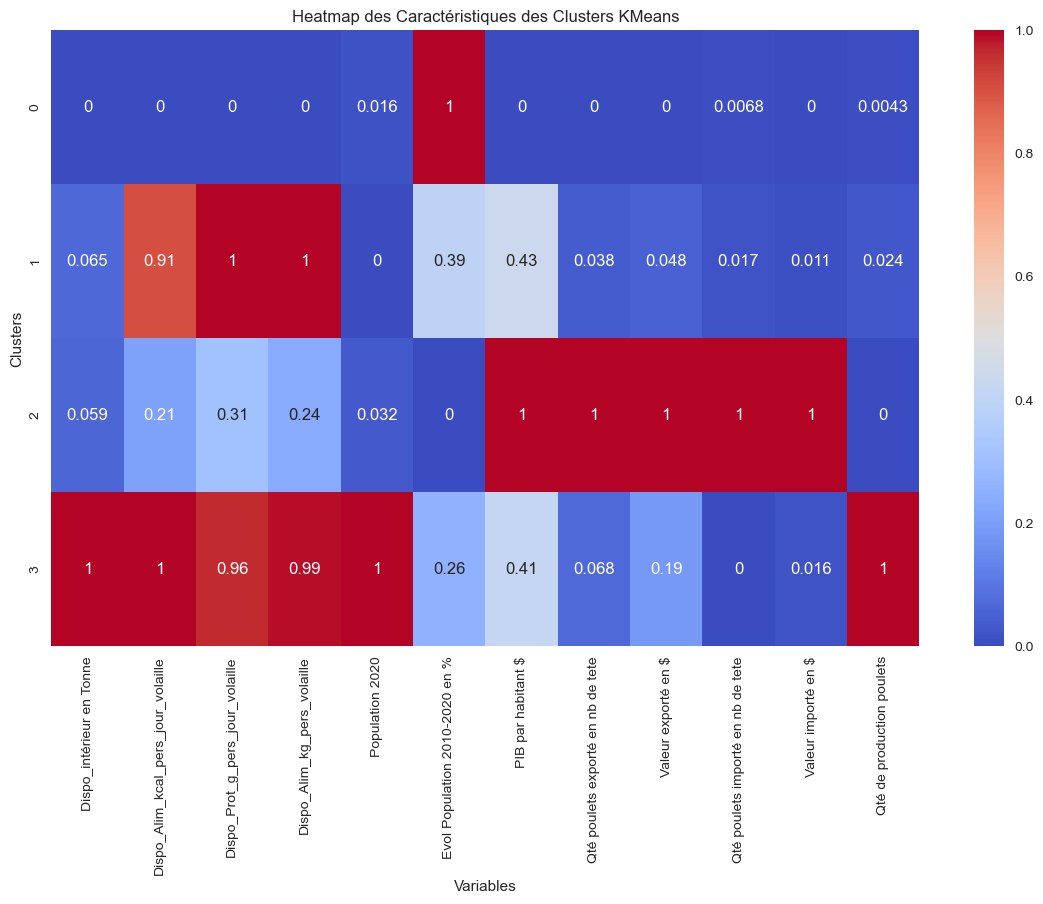

In [9]:

# Je réalise le clustering en utilisant KMeans avec 4 clusters
modele_kmeans = KMeans(n_clusters=4, random_state=42)
modele_kmeans.fit(donnees_standardise)

# Je récupère les étiquettes de clusters générées par le modèle KMeans
etiquettes_clusters = modele_kmeans.labels_

# J'ajoute ces étiquettes de cluster aux données originales pour plus d'analyse
donnees_originale['Cluster_KMeans'] = etiquettes_clusters

# Je calcule la moyenne de chaque caractéristique pour chaque cluster créé par KMeans
resume_cluster = donnees_originale.groupby('Cluster_KMeans').mean()

# Je normalise le résumé des clusters pour que les valeurs soient comprises entre 0 et 1
# Cela facilite la visualisation sur la heatmap
resume_cluster_normalise = (resume_cluster - resume_cluster.min()) / (resume_cluster.max() - resume_cluster.min())

# Je crée la heatmap pour visualiser les moyennes des caractéristiques pour chaque cluster
plt.figure(figsize=(14, 8))
sns.heatmap(resume_cluster_normalise, annot=True, cmap='coolwarm', cbar=True)

# Je donne un titre à la heatmap et j'ajoute des étiquettes pour les axes pour une meilleure compréhension
plt.title('Heatmap des Caractéristiques des Clusters KMeans')
plt.xlabel('Variables')
plt.ylabel('Clusters')

# Je montre la heatmap
plt.show()


Heatmap des différents cluster pour le KMEANS

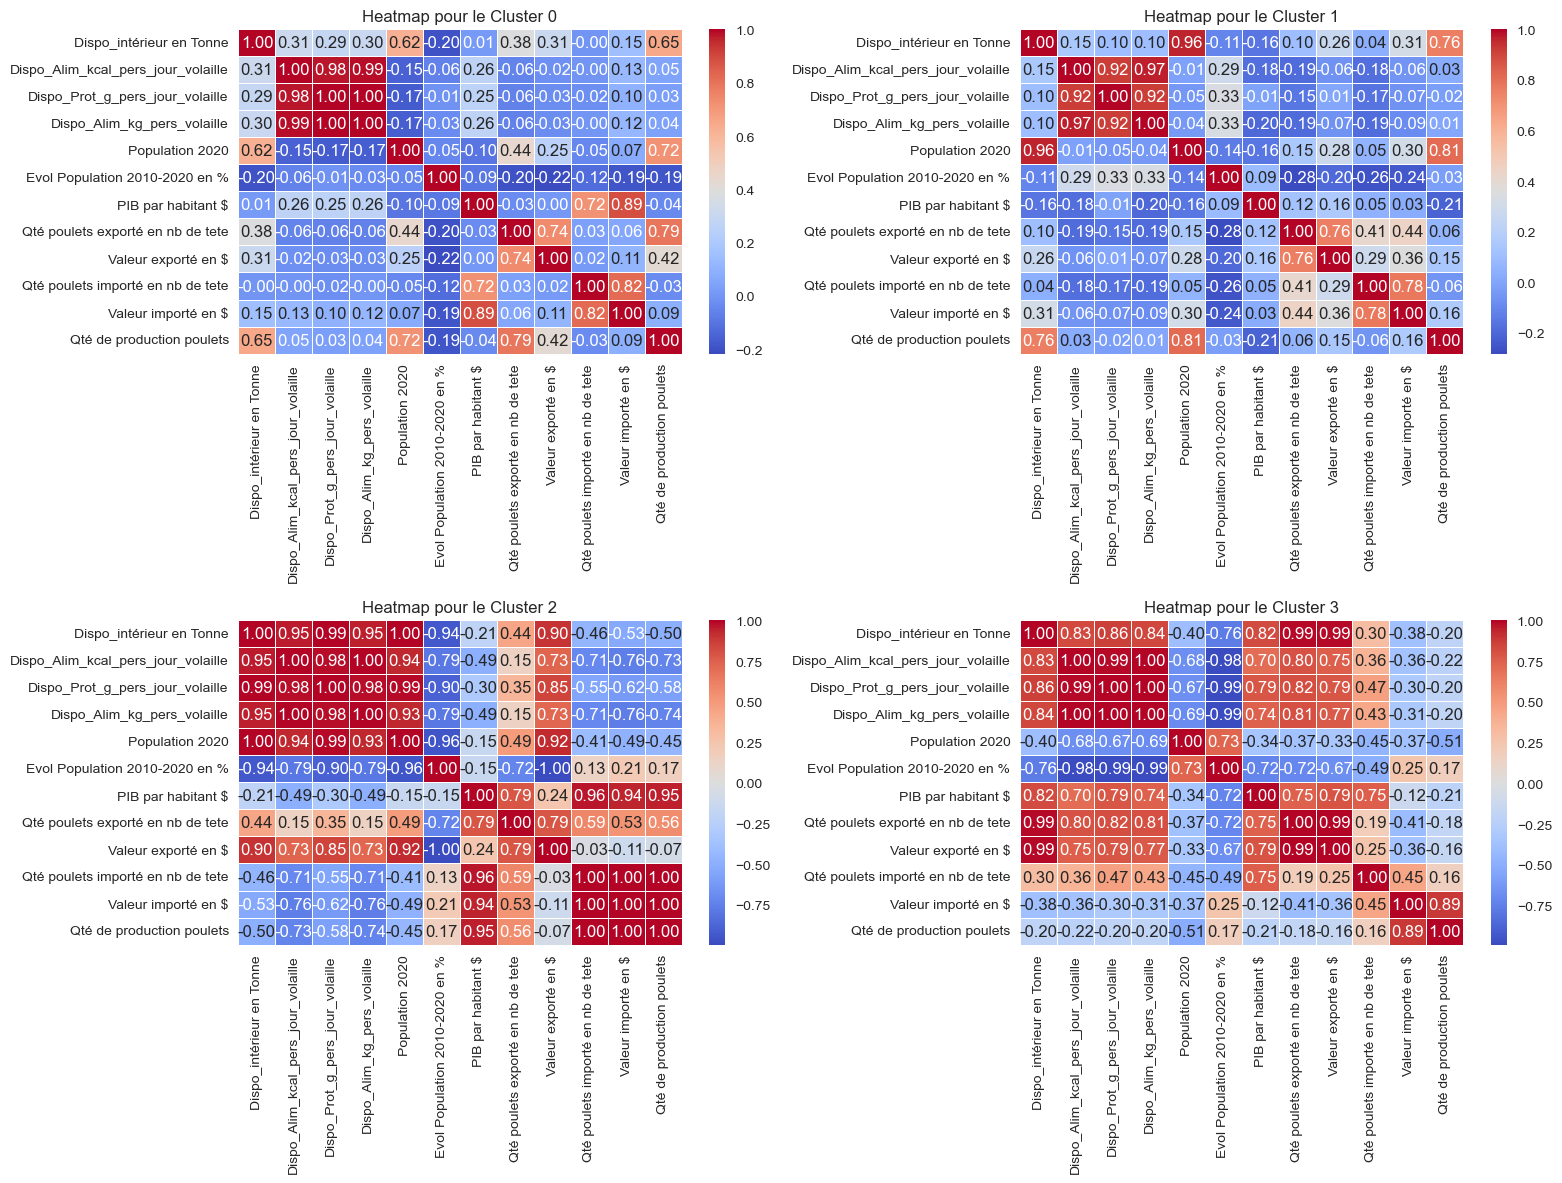

In [10]:
# Ajout des étiquettes de clusters K-means au DataFrame original
etiquettes_clusters = modele_kmeans.labels_

donnees_originale['Cluster_KMeans'] = etiquettes_clusters

# Initialisation de la figure pour les heatmaps
plt.figure(figsize=(16, 12))

# Boucle sur chaque cluster unique pour générer une heatmap
for i, cluster in enumerate(set(etiquettes_clusters), 1):
    plt.subplot(2, 2, i)  # Ajustez les dimensions en fonction du nombre de clusters
    # Filtrer le DataFrame pour obtenir les données appartenant à ce cluster spécifique
    donnees_cluster = donnees_originale[donnees_originale['Cluster_KMeans'] == cluster].select_dtypes(include=['float64'])
    
    # Création de la heatmap
    sns.heatmap(donnees_cluster.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Heatmap pour le Cluster {cluster}')

# Ajuster l'espacement pour éviter le chevauchement
plt.tight_layout()
plt.show()


Heatmap des différents cluster et pays pour le kmeans

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


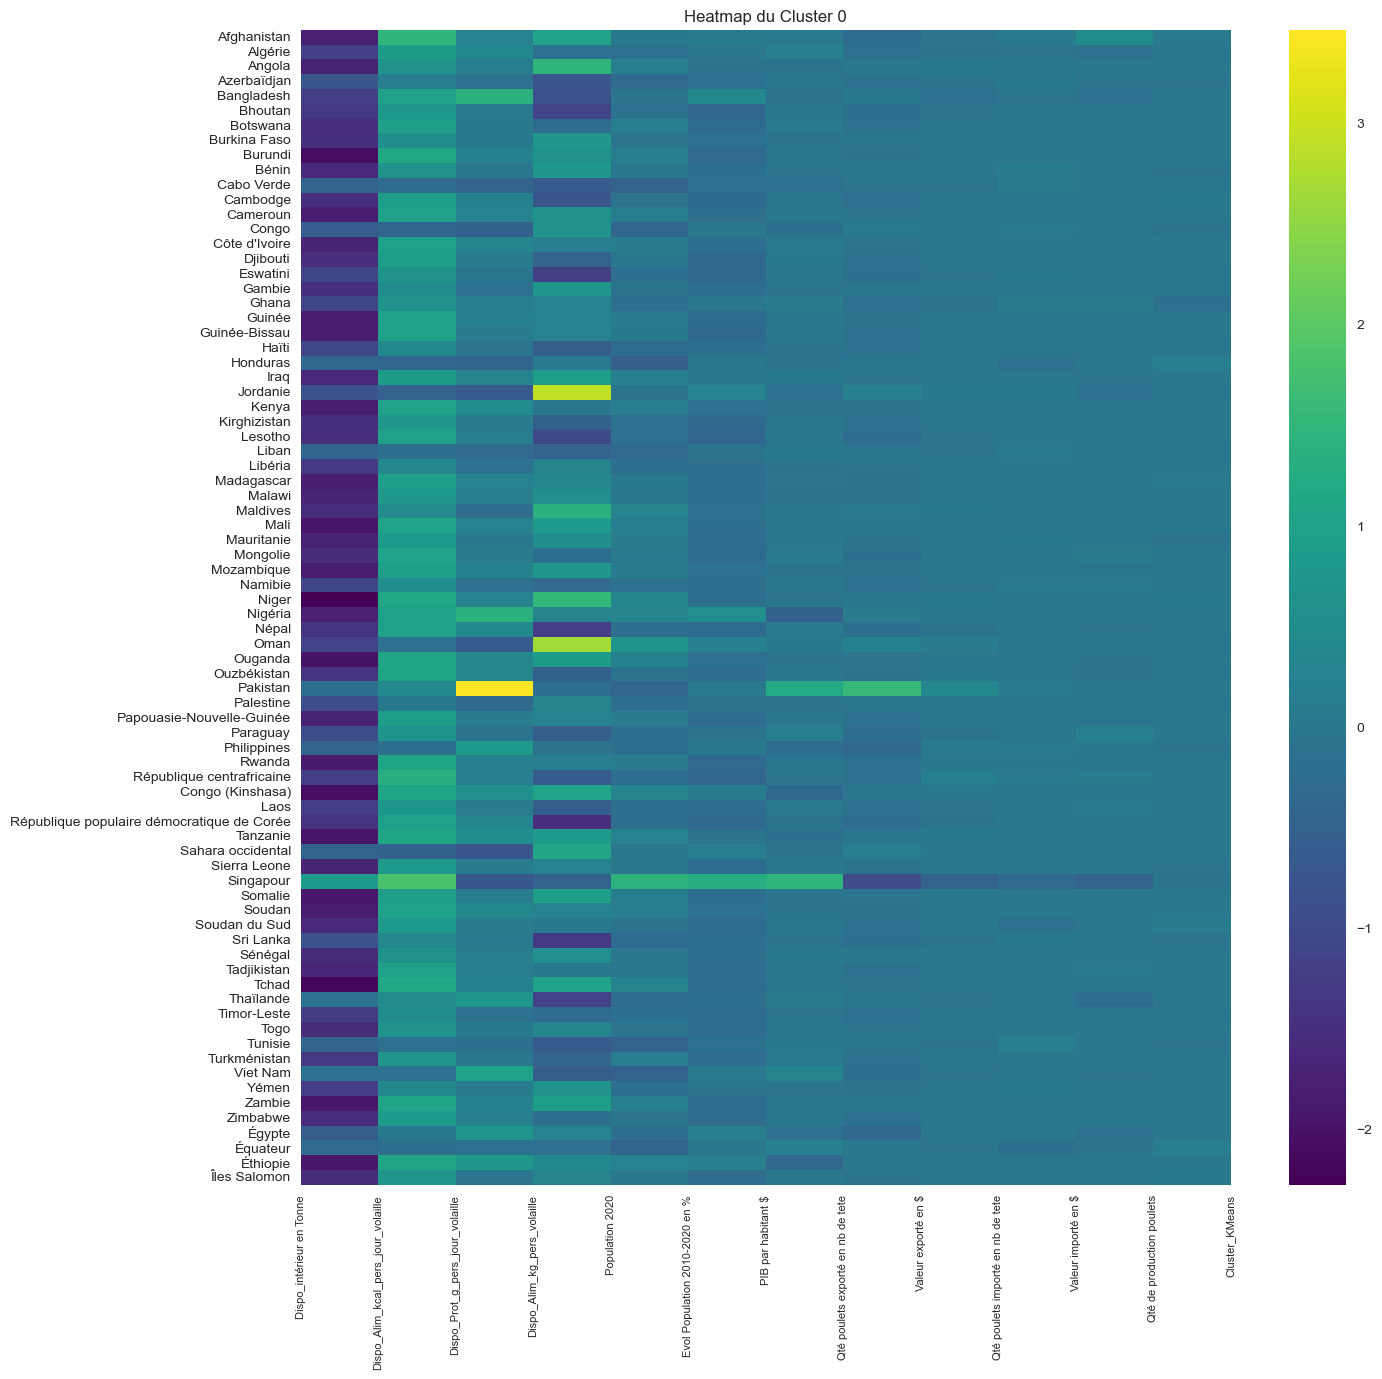

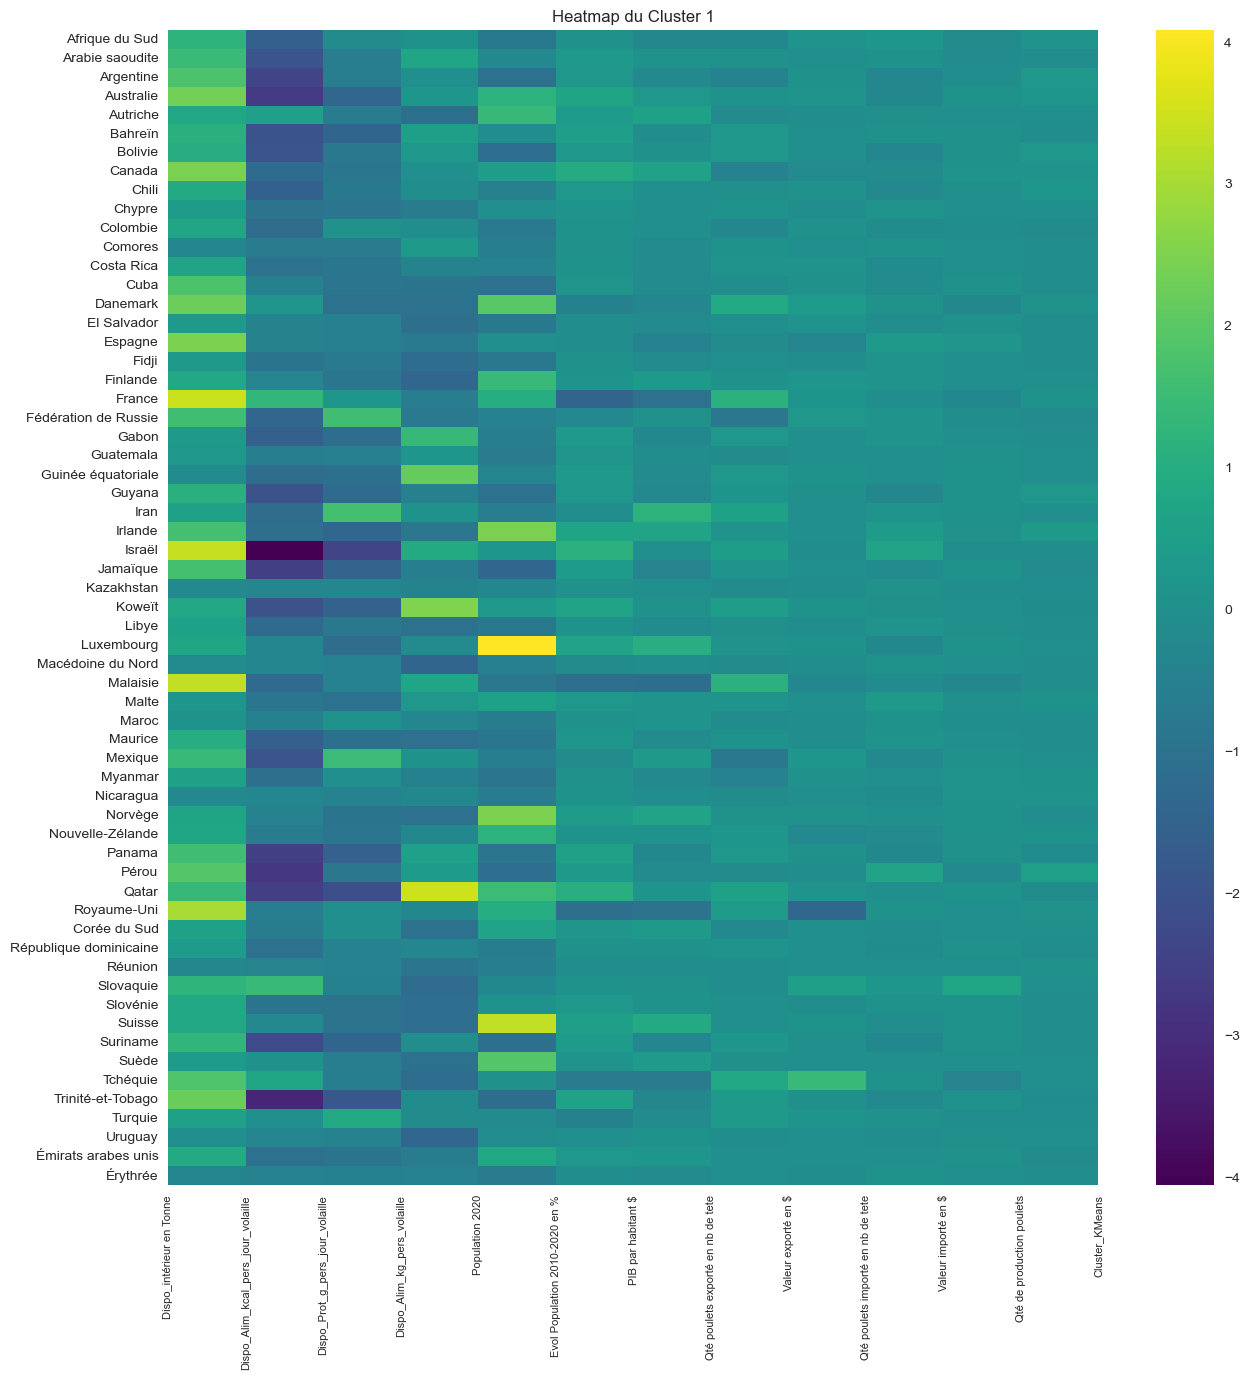

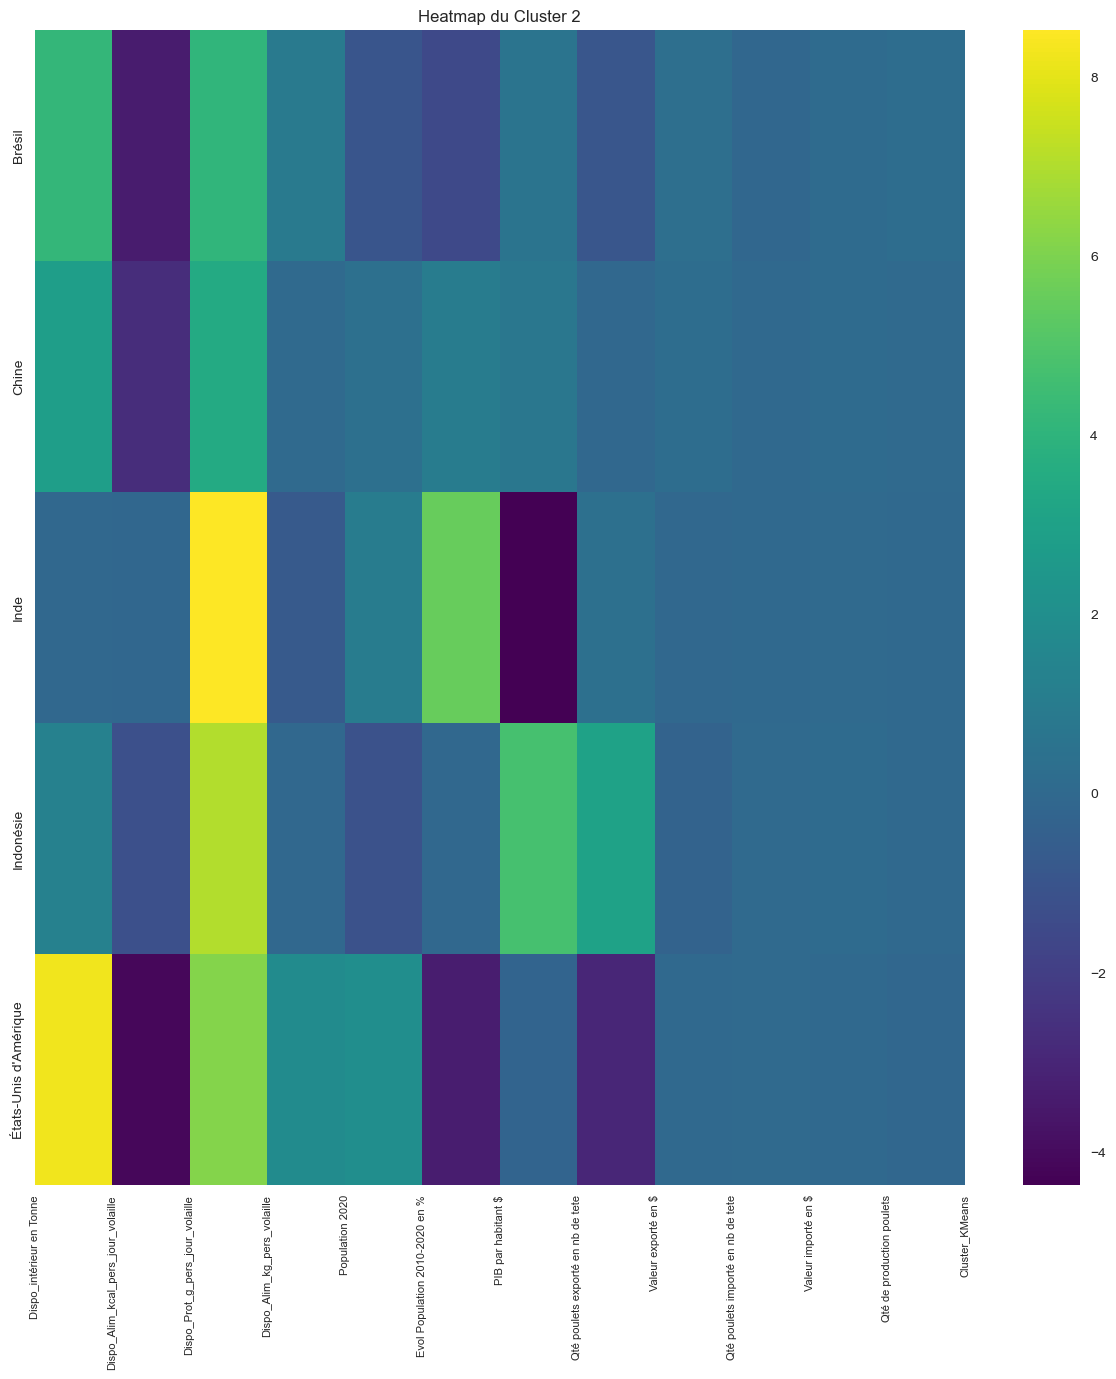

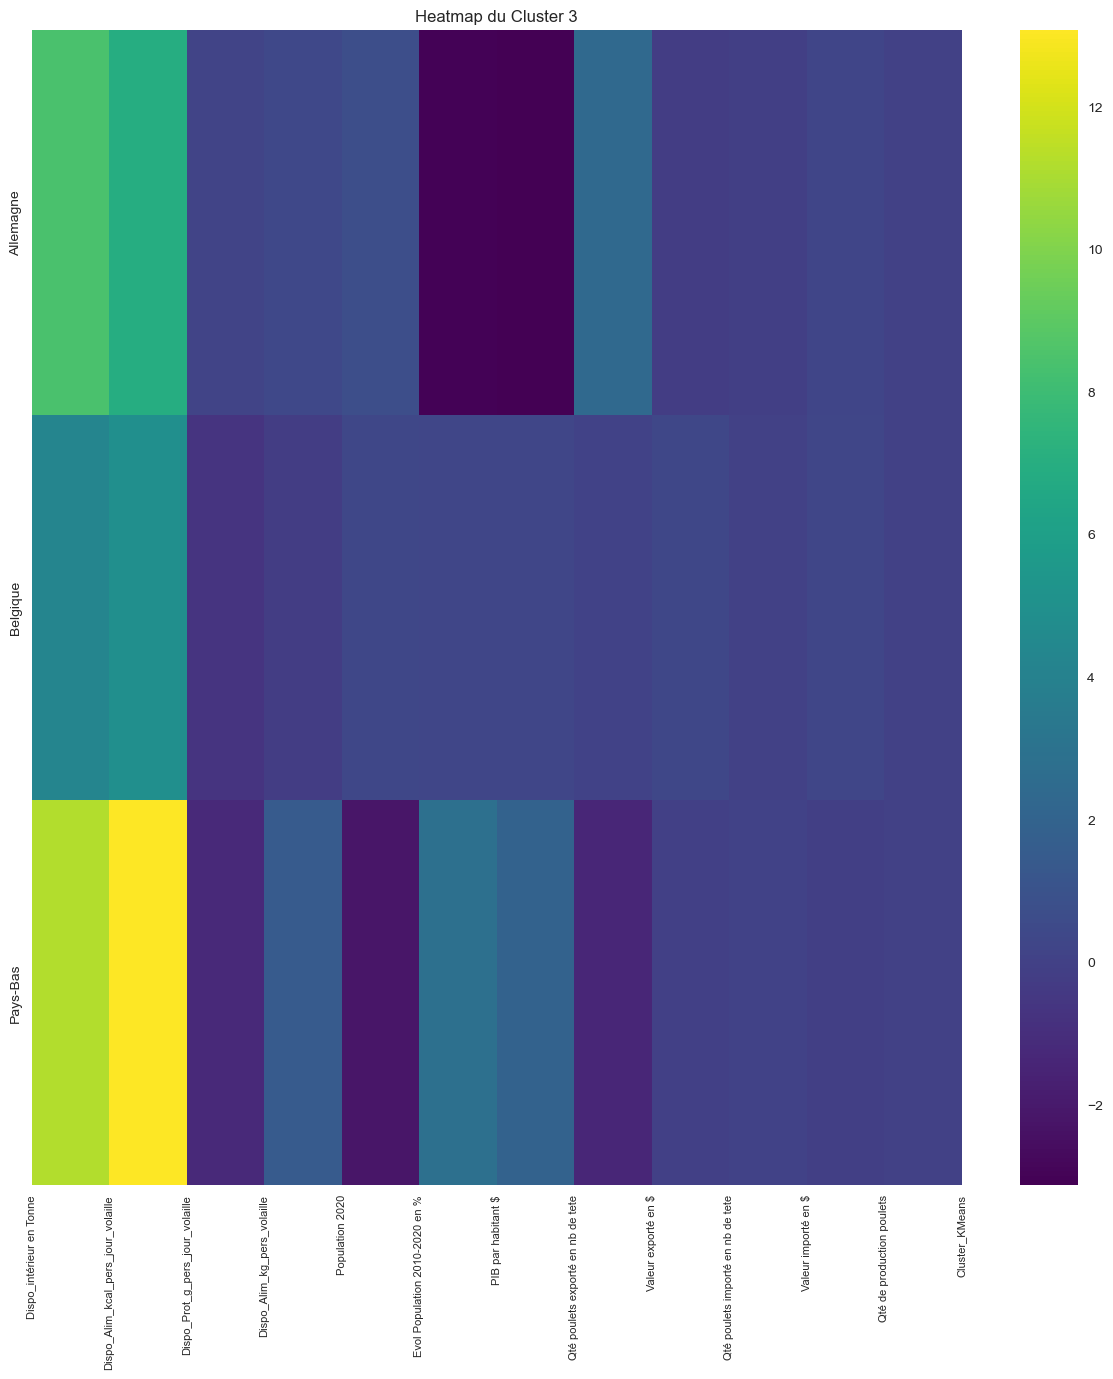

In [11]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Je définis le nombre de clusters souhaité
nombre_clusters = 4

# Je utilise KMeans pour obtenir les affectations de clusters
modele_kmeans = KMeans(n_clusters=nombre_clusters).fit(donnees_standardise)
etiquettes_clusters = modele_kmeans.labels_

# Je boucle sur chaque cluster unique pour visualiser les données de ce cluster avec une heatmap
for cluster in set(etiquettes_clusters):
    # Je filtre les données pour ne contenir que les échantillons de ce cluster
    donnees_cluster = donnees_standardise[etiquettes_clusters == cluster]
    etiquettes_zone = donnees_originale['Zone'][etiquettes_clusters == cluster].values
    
    # Je crée la heatmap
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(donnees_cluster, yticklabels=etiquettes_zone, cmap='viridis', ax=ax)
    ax.set_title(f'Heatmap du Cluster {cluster}')
    
    # J'ajoute les étiquettes de colonnes (noms des variables) comme étiquettes de l'axe des x
    ax.set_xticks(np.arange(len(donnees_originale.columns) - 1)) # Soustraction de 1 pour exclure la colonne 'Zone'
    ax.set_xticklabels(donnees_originale.columns[1:], rotation=90, fontsize=8) # Exclusion de la colonne 'Zone'

    plt.show()


Liste des pays par cluster 

In [12]:

modele_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
modele_kmeans.fit(donnees_standardise)

etiquettes_clusters = modele_kmeans.labels_

donnees_originale['Cluster'] = modele_kmeans.labels_

# Crée un dictionnaire pour stocker les pays par cluster
pays_par_cluster = {}

# Je boucle sur chaque cluster unique
for cluster in set(modele_kmeans.labels_):
    # Je filtre les données pour ne contenir que les échantillons de ce cluster
    etiquettes_zone = donnees_originale['Zone'][donnees_originale['Cluster'] == cluster].values
    
    # Met à jour le dictionnaire avec les pays de ce cluster
    pays_par_cluster[cluster] = etiquettes_zone.tolist()

# Affiche la liste des pays par cluster
print("Liste des pays par cluster:")
for cluster, pays in pays_par_cluster.items():
    print(f"Cluster {cluster}: {pays}")


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Liste des pays par cluster:
Cluster 0: ['Afghanistan', 'Algérie', 'Angola', 'Azerbaïdjan', 'Bangladesh', 'Bhoutan', 'Botswana', 'Burkina Faso', 'Burundi', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Honduras', 'Iraq', 'Jordanie', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Niger', 'Nigéria', 'Népal', 'Oman', 'Ouganda', 'Ouzbékistan', 'Pakistan', 'Palestine', 'Papouasie-Nouvelle-Guinée', 'Paraguay', 'Philippines', 'Rwanda', 'République centrafricaine', 'Congo (Kinshasa)', 'Laos', 'République populaire démocratique de Corée', 'Tanzanie', 'Sahara occidental', 'Sierra Leone', 'Singapour', 'Somalie', 'Soudan', 'Soudan du Sud', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Thaïlande', 'Timor-Leste', 'Togo', 'Tunisie', 'Turkménistan', 'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe',

Graphique Radar des Clusters kmeans

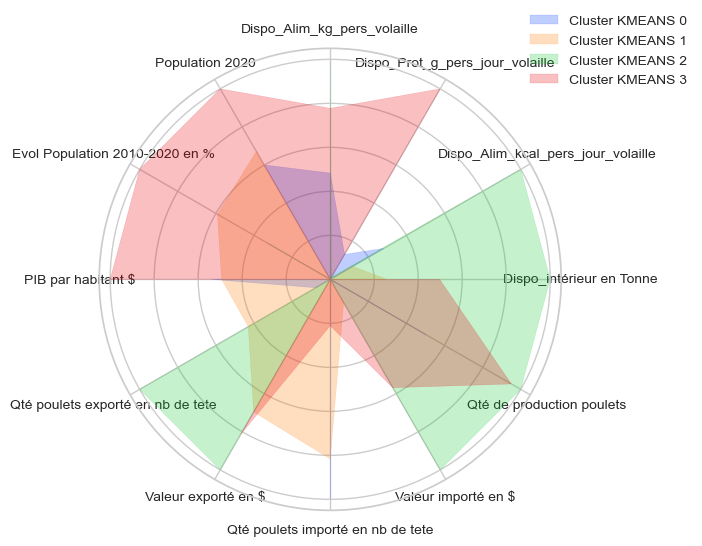

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Je récupère les centres des clusters
centres_clusters = modele_kmeans.cluster_centers_

# Je convertis les centres des clusters en DataFrame
moyennes_clusters = pd.DataFrame(centres_clusters, columns=df_kmeans.columns[:-1])

# Je normalise les centres des clusters
normaliseur_minmax = MinMaxScaler()
moyennes_clusters_normalisees = normaliseur_minmax.fit_transform(moyennes_clusters)
moyennes_clusters_normalisees = pd.DataFrame(moyennes_clusters_normalisees, columns=moyennes_clusters.columns)

# Je prépare les données pour le graphique radar
etiquettes = moyennes_clusters.columns.tolist()
nombre_variables = len(etiquettes)
angles = np.linspace(0, 2 * np.pi, nombre_variables, endpoint=False).tolist()
angles += angles[:1]
palette_couleurs = sns.color_palette("bright", len(moyennes_clusters))

# Je trace le graphique radar pour chaque centre de cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
for i, couleur in enumerate(palette_couleurs):
    valeurs = moyennes_clusters_normalisees.iloc[i].tolist()
    valeurs += valeurs[:1]
    ax.fill(angles, valeurs, color=couleur, alpha=0.25, label=f'Cluster KMEANS {i}')
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(etiquettes)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


Segmentation CAH + heatmap

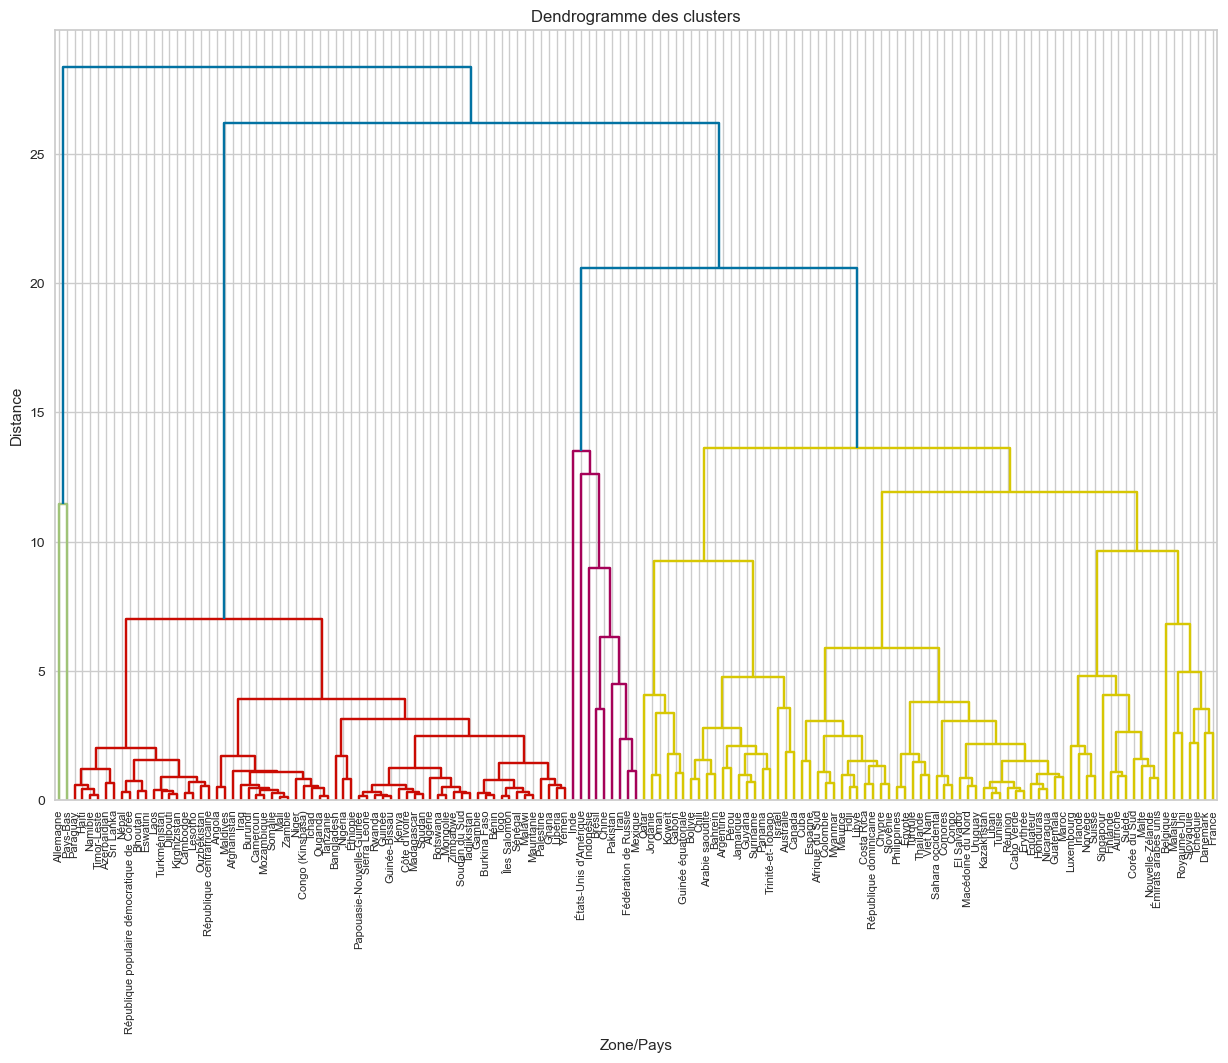

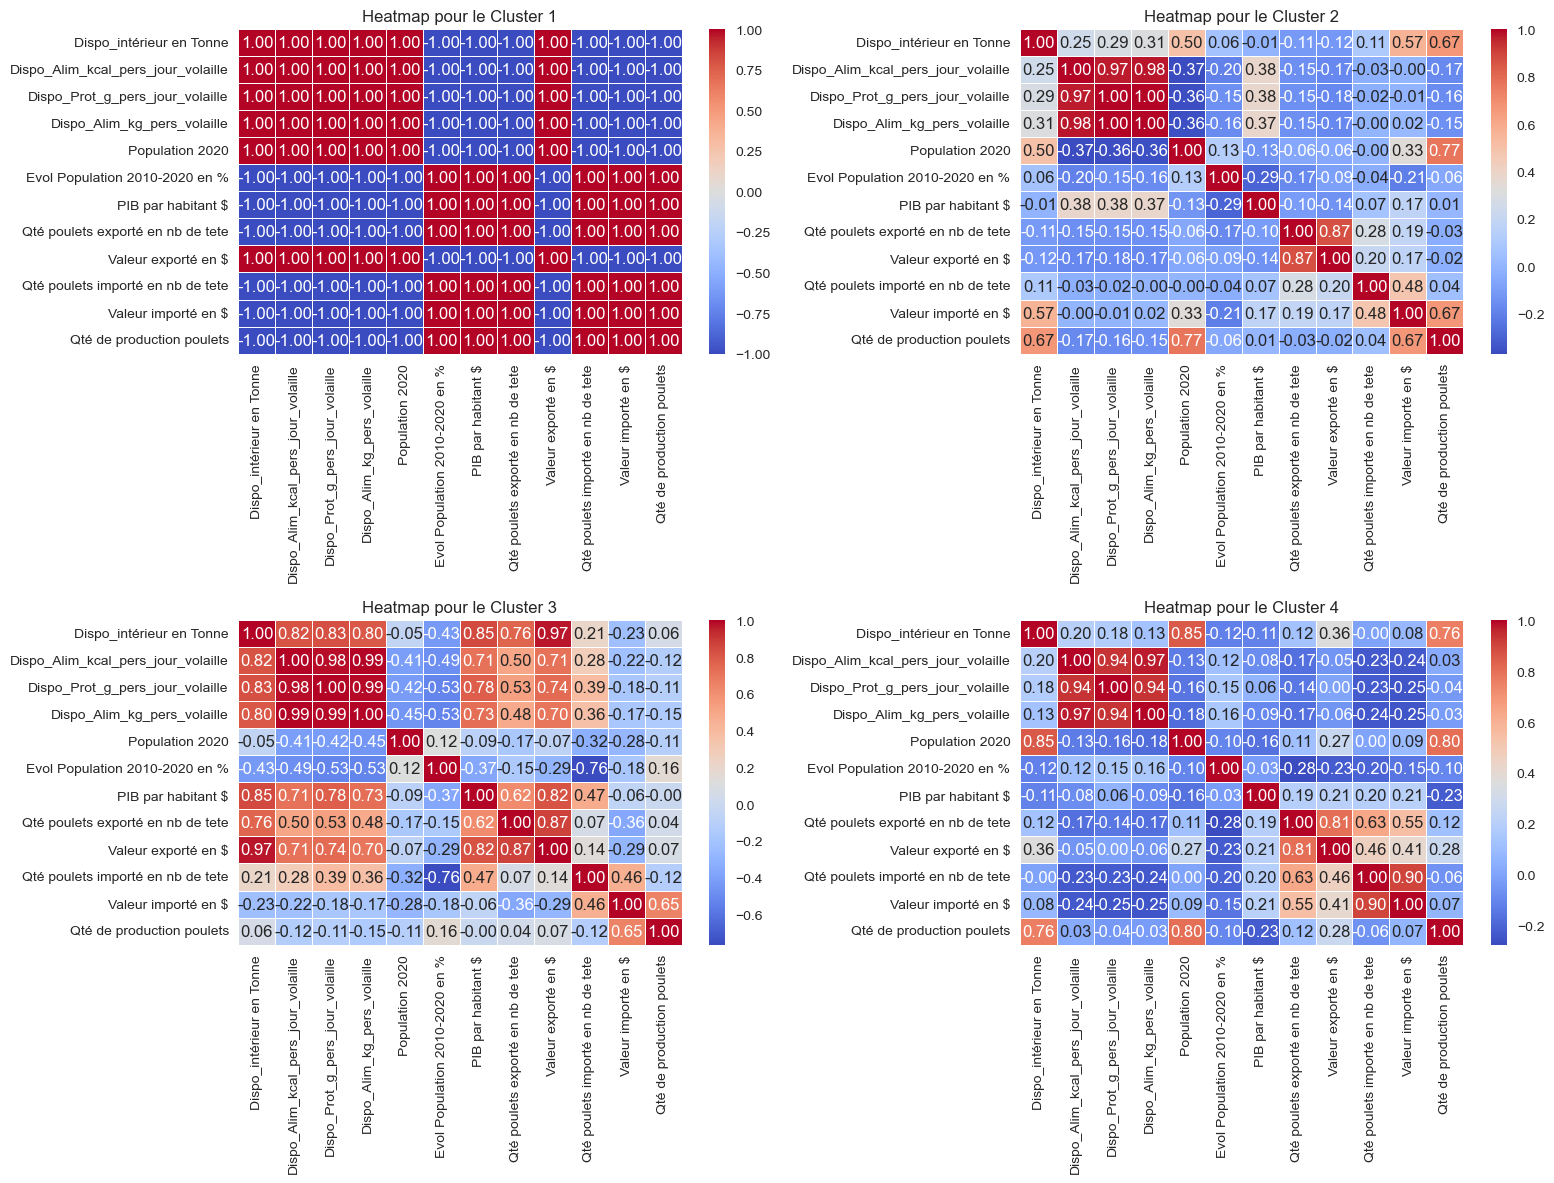

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 1 : Je réalise le clustering hiérarchique
matrice_liens = linkage(donnees_standardise, 'ward')

# Étape 2 : Je coupe le dendrogramme pour obtenir 4 clusters
etiquettes_clusters = fcluster(matrice_liens, 4, criterion='maxclust')

# J'ajoute ces étiquettes à mon DataFrame original
donnees_originale['Cluster_CAH'] = etiquettes_clusters

# Étape 3 : Je crée un dendrogramme
plt.figure(figsize=(15, 10))
dendrogram(
    matrice_liens,
    labels=donnees_originale['Zone'].values,
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=15
)
plt.title('Dendrogramme des clusters')
plt.xlabel('Zone/Pays')
plt.ylabel('Distance')
plt.show()

# Étape 4 : Je crée des heatmaps pour chaque cluster
plt.figure(figsize=(16, 12))
for i in range(1, 5):  # Je suppose que nous avons 4 clusters
    plt.subplot(2, 2, i)
    donnees_cluster = donnees_originale[donnees_originale['Cluster_CAH'] == i].select_dtypes(include=['float64'])
    sns.heatmap(donnees_cluster.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Heatmap pour le Cluster {i}')

plt.tight_layout()
plt.show()


Heatmap simplifier cah

C:\Users\M710q\AppData\Local\Temp\ipykernel_10960\274020003.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resume_cluster_cah = donnees_originale.groupby('Cluster_CAH').mean()


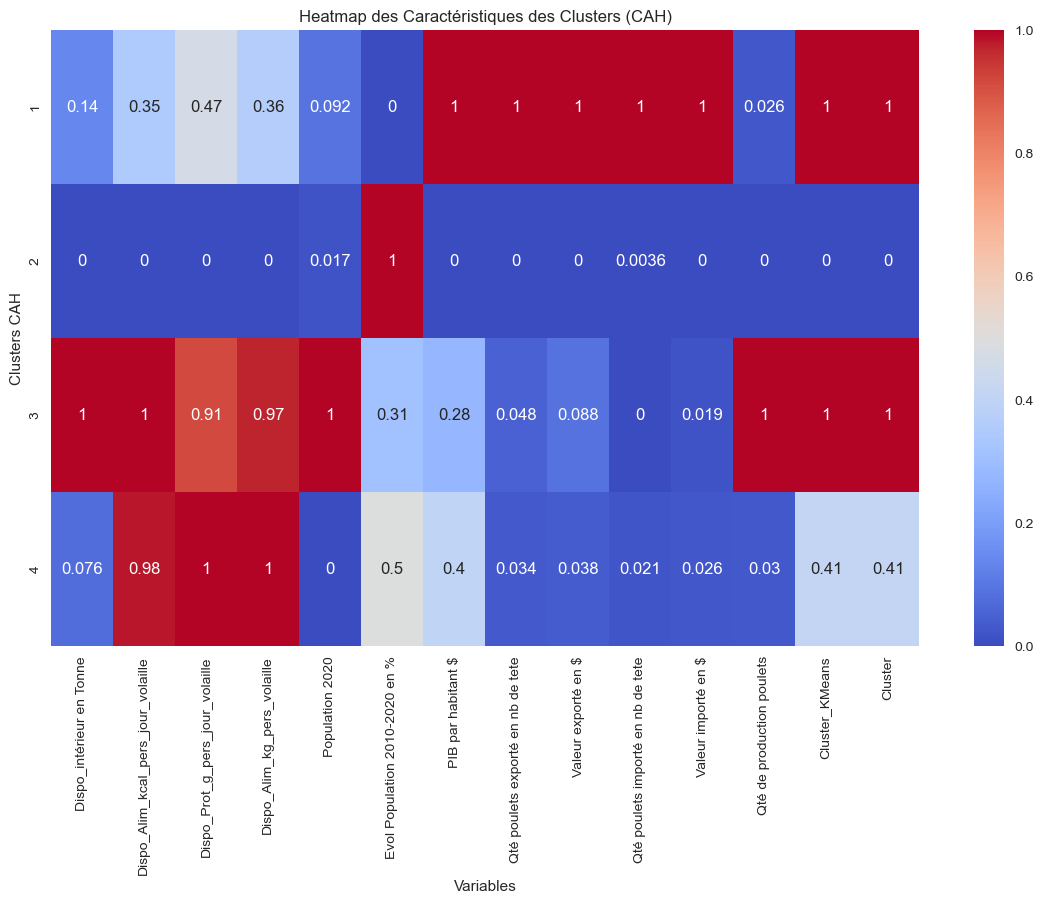

In [15]:


# Je génère la matrice de liens en utilisant la méthode de Ward pour le clustering hiérarchique
matrice_liens = linkage(donnees_standardise, 'ward')

# Je crée des étiquettes de cluster en utilisant le clustering hiérarchique avec 4 clusters
etiquettes_clusters_cah = fcluster(matrice_liens, t=4, criterion='maxclust')

# J'ajoute les étiquettes de clusters CAH aux données originales
donnees_originale['Cluster_CAH'] = etiquettes_clusters_cah

# Je calcule la moyenne de chaque caractéristique pour chaque cluster CAH
resume_cluster_cah = donnees_originale.groupby('Cluster_CAH').mean()

# Je normalise le résumé du cluster CAH pour l'utiliser dans la heatmap
resume_cluster_cah_normalise = (resume_cluster_cah - resume_cluster_cah.min()) / (resume_cluster_cah.max() - resume_cluster_cah.min())

# Je crée la heatmap pour visualiser les caractéristiques de chaque cluster CAH
plt.figure(figsize=(14, 8))
sns.heatmap(resume_cluster_cah_normalise, annot=True, cmap='coolwarm', cbar=True)

# Je donne un titre et des étiquettes à la heatmap pour une meilleure interprétation
plt.title('Heatmap des Caractéristiques des Clusters (CAH)')
plt.xlabel('Variables')
plt.ylabel('Clusters CAH')

# Je montre la heatmap
plt.show()


Heatmap cluster et pays CAH

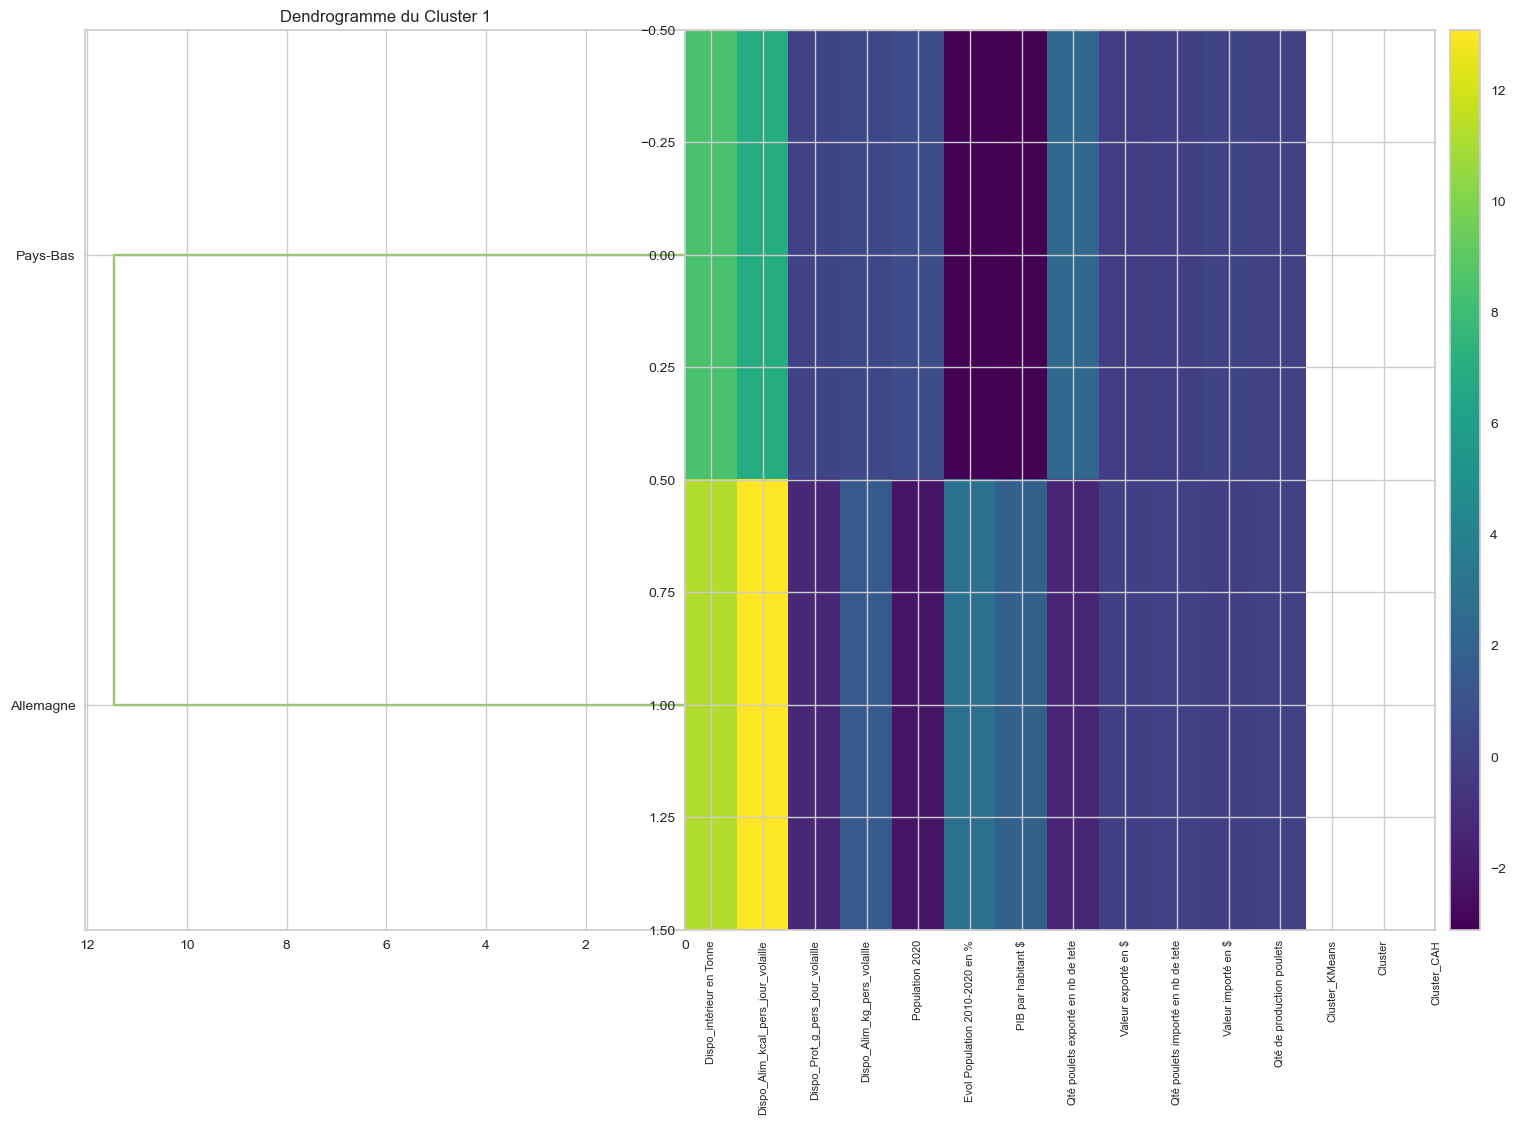

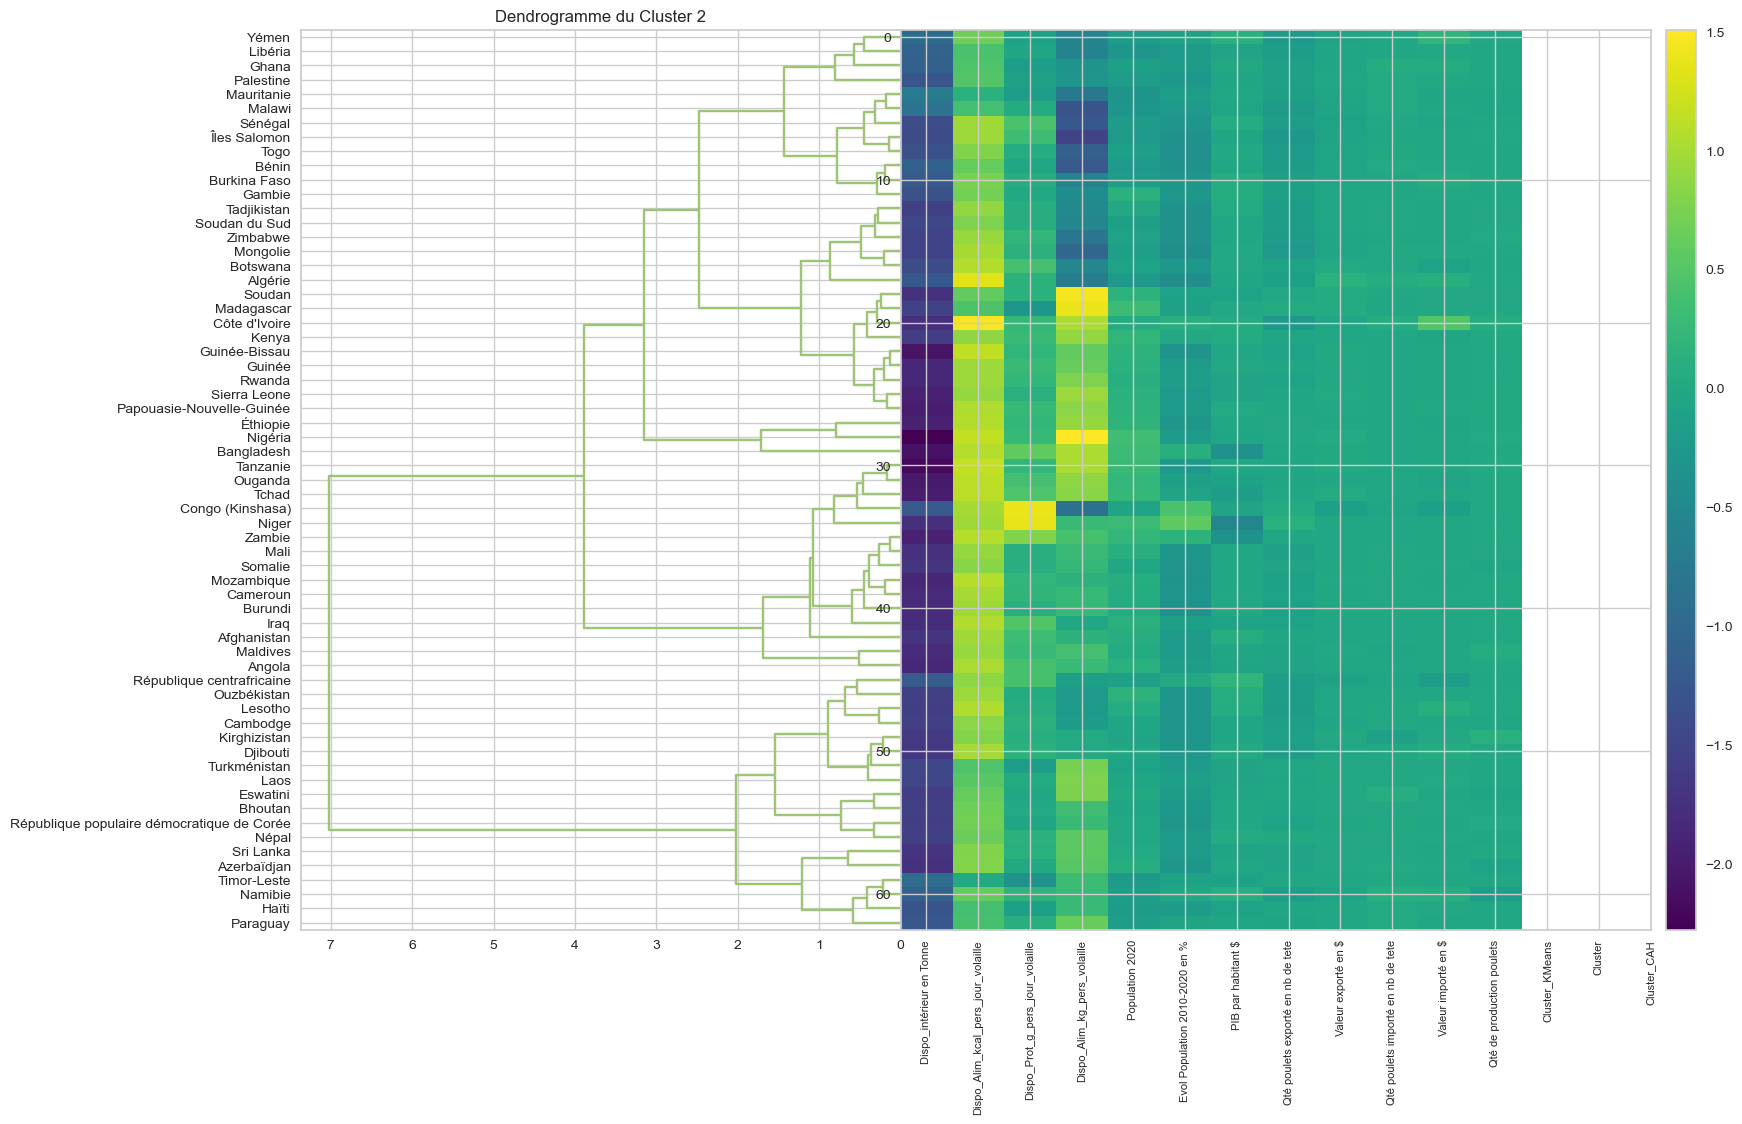

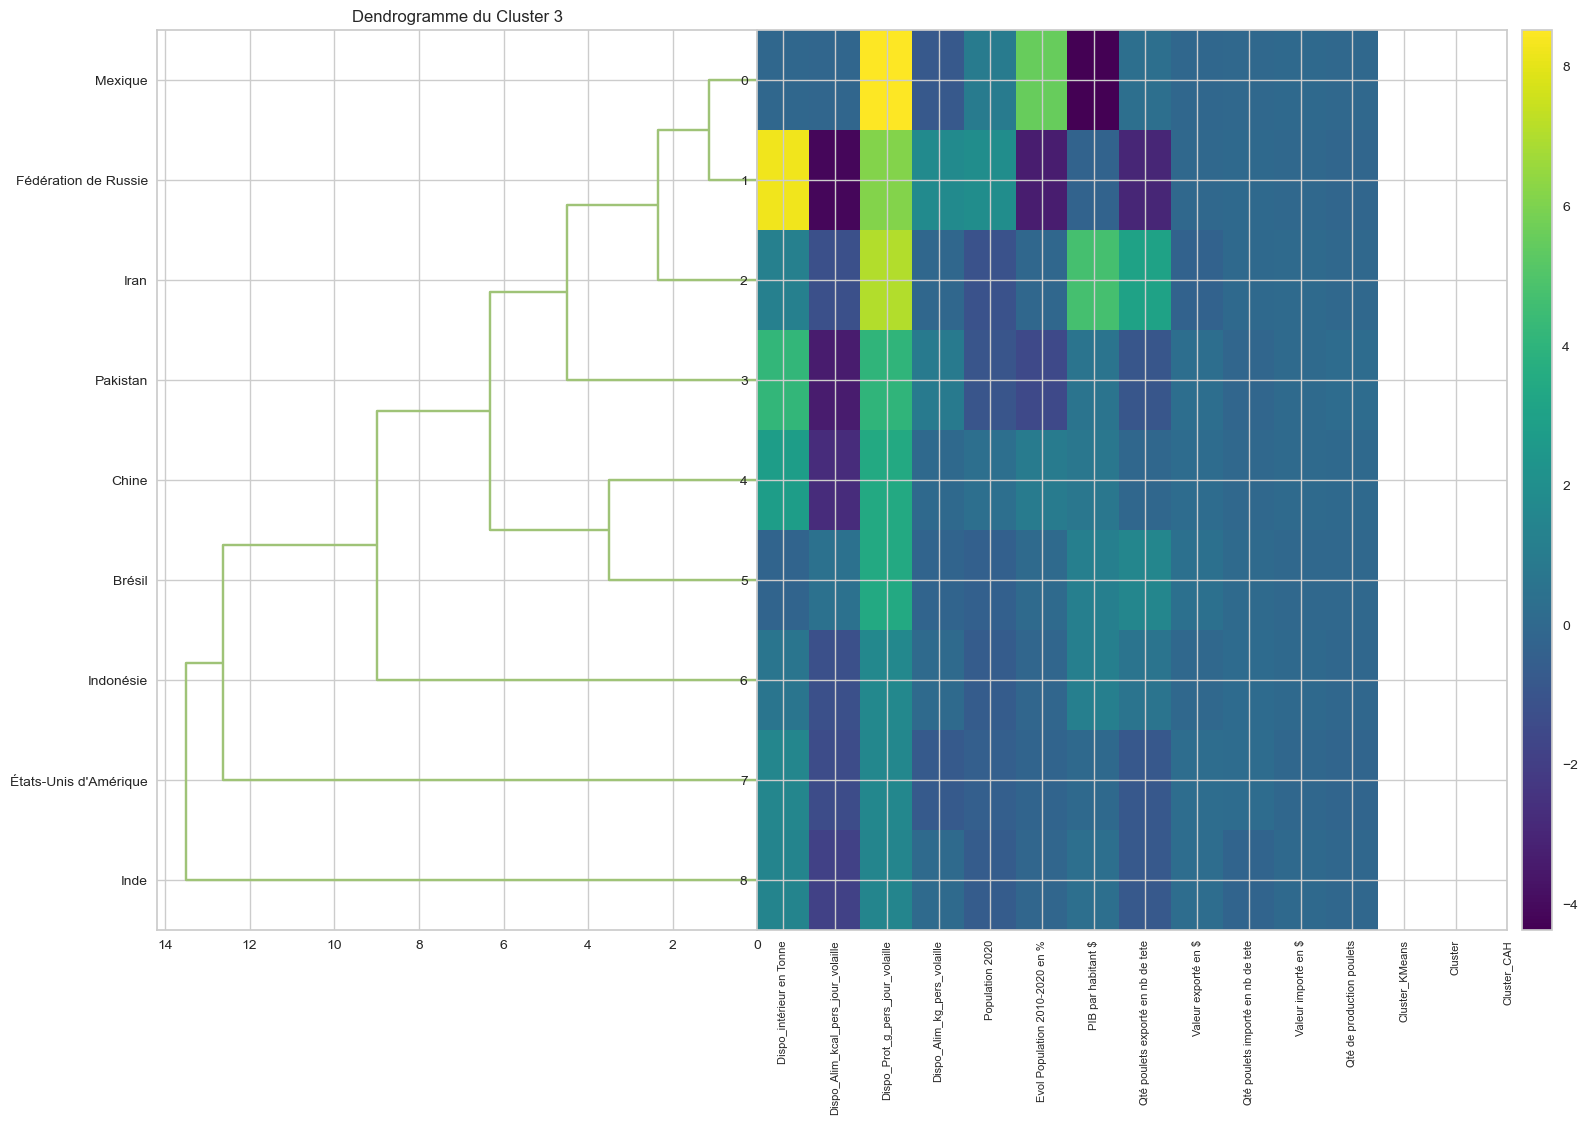

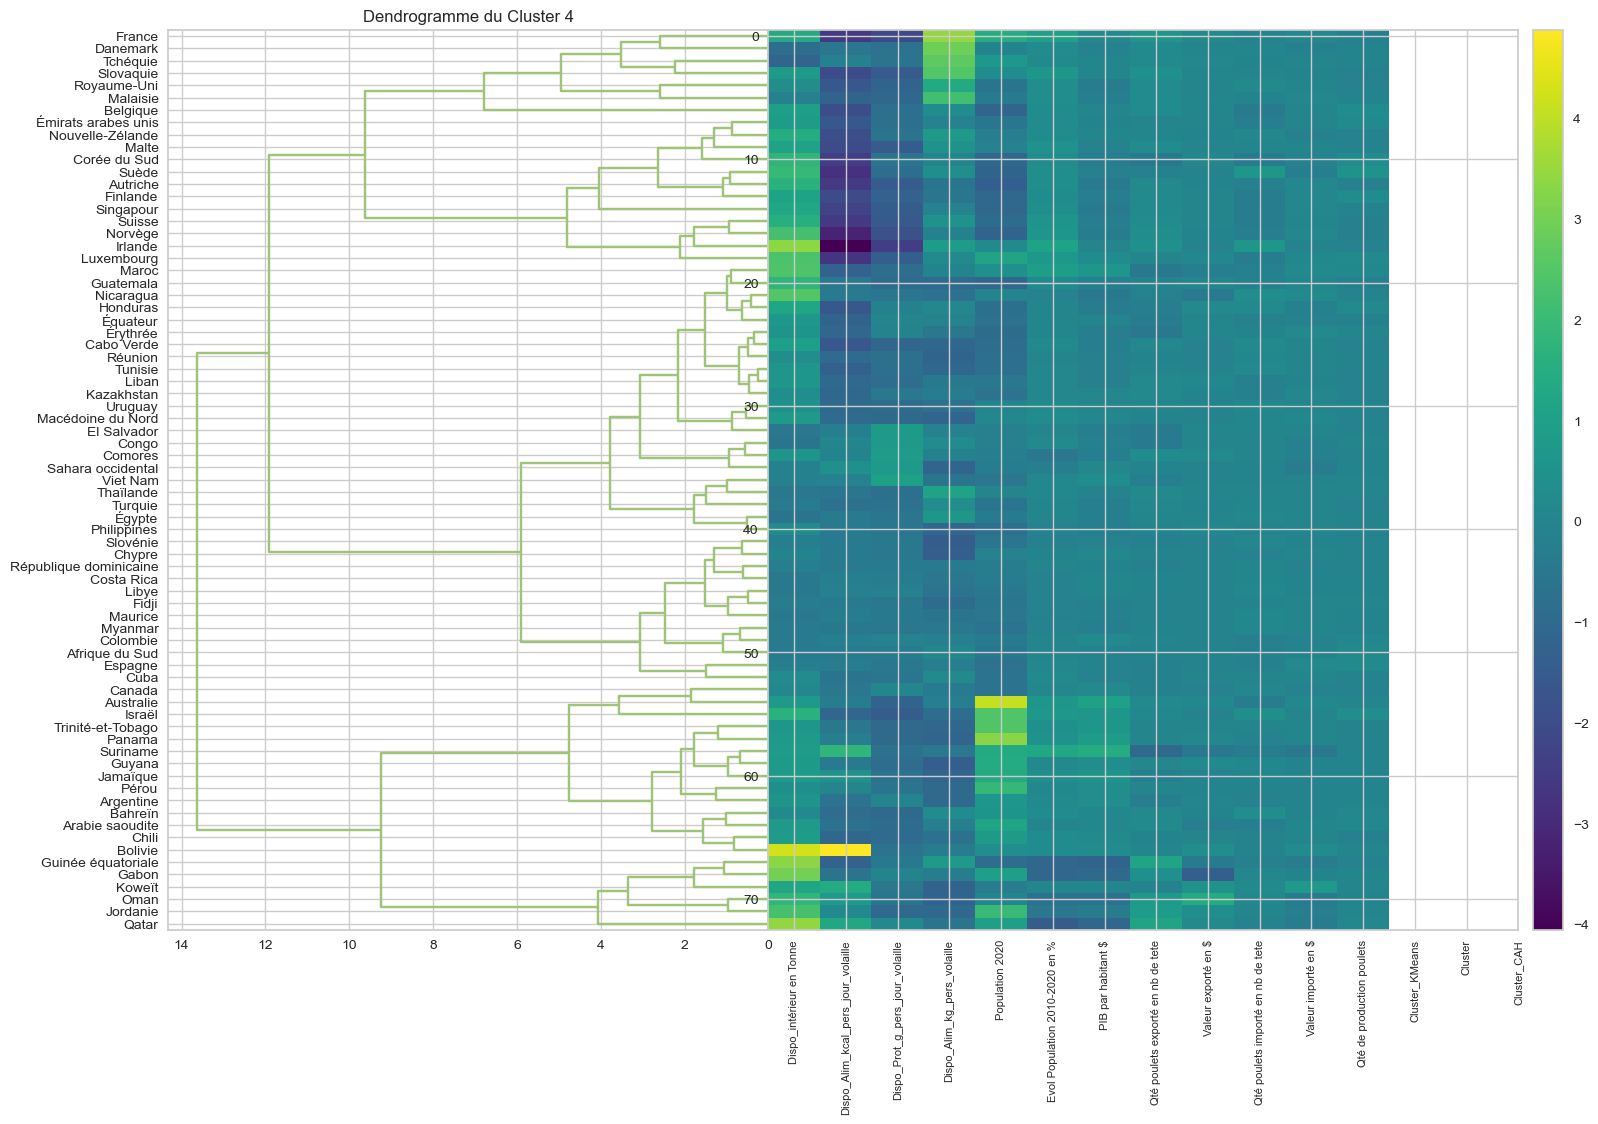

In [16]:
from scipy.cluster.hierarchy import fcluster, linkage
import numpy as np
import matplotlib.pyplot as plt

# Je définis le nombre de clusters souhaité
nombre_clusters = 4

# J'utilise fcluster pour obtenir les affectations de clusters
etiquettes_clusters = fcluster(matrice_liens, nombre_clusters, criterion='maxclust')

# Je boucle sur chaque cluster unique pour créer un dendrogramme avec une heatmap
for cluster in set(etiquettes_clusters):
    # Je filtre les données pour ne contenir que les échantillons de ce cluster
    donnees_cluster = donnees_standardise[etiquettes_clusters == cluster]
    etiquettes_zone = donnees_originale['Zone'][etiquettes_clusters == cluster].values
    
    # J'effectue le clustering hiérarchique sur ce cluster
    matrice_liens_cluster = linkage(donnees_cluster, 'ward')
    
    # Je crée le dendrogramme
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_axes([0.05, 0.1, 0.4, 0.6])
    dendrogram(
        matrice_liens_cluster,
        labels=etiquettes_zone,
        leaf_rotation=0,
        leaf_font_size=10,
        color_threshold=15,
        orientation='left'
    )
    ax1.set_title(f'Dendrogramme du Cluster {cluster}')
    ax1.yaxis.tick_left()
    
    # Je crée la heatmap
    ax2 = fig.add_axes([0.45, 0.1, 0.5, 0.6])
    idx = dendrogram(
        matrice_liens_cluster,
        leaf_rotation=0,
        leaf_font_size=10,
        color_threshold=15,
        orientation='left',
        no_plot=True
    )['leaves']
    donnees_cluster_numpy = donnees_cluster.to_numpy()
    im = ax2.imshow(donnees_cluster_numpy[idx, :], aspect='auto', cmap='viridis')

    
    # J'ajoute les étiquettes de colonnes (noms des variables) comme étiquettes de l'axe des x
    ax2.set_xticks(np.arange(len(donnees_originale.columns) - 1))  # Soustraction de 1 pour exclure la colonne 'Zone'
    ax2.set_xticklabels(donnees_originale.columns[1:], rotation=90, fontsize=8)  # Exclusion de la colonne 'Zone'
    
    # J'ajoute une barre de couleur
    cbar_ax = fig.add_axes([0.96, 0.1, 0.02, 0.6])
    fig.colorbar(im, cax=cbar_ax)

    plt.show()


Liste des pays par cluster 

In [17]:
from scipy.cluster.hierarchy import fcluster, linkage
import numpy as np
import pandas as pd  # Je suppose que vous utilisez pandas pour gérer vos données

# Je suppose que `matrice_liens` et `donnees_originale` sont déjà définis dans votre code

# Je définis le nombre de clusters souhaité
nombre_clusters = 4

# J'utilise fcluster pour obtenir les affectations de clusters
etiquettes_clusters = fcluster(matrice_liens, nombre_clusters, criterion='maxclust')

# Crée un dictionnaire pour stocker les pays par cluster
pays_par_cluster = {}

# Je boucle sur chaque cluster unique
for cluster in set(etiquettes_clusters):
    # Je filtre les données pour ne contenir que les échantillons de ce cluster
    etiquettes_zone = donnees_originale['Zone'][etiquettes_clusters == cluster].values
    
    # Met à jour le dictionnaire avec les pays de ce cluster
    pays_par_cluster[cluster] = etiquettes_zone.tolist()

# Affiche la liste des pays par cluster
print("Liste des pays par cluster:")
for cluster, pays in pays_par_cluster.items():
    print(f"Cluster {cluster}: {pays}")


Liste des pays par cluster:
Cluster 1: ['Allemagne', 'Pays-Bas']
Cluster 2: ['Afghanistan', 'Algérie', 'Angola', 'Azerbaïdjan', 'Bangladesh', 'Bhoutan', 'Botswana', 'Burkina Faso', 'Burundi', 'Bénin', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Djibouti', 'Eswatini', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Iraq', 'Kenya', 'Kirghizistan', 'Lesotho', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Palestine', 'Papouasie-Nouvelle-Guinée', 'Paraguay', 'Rwanda', 'République centrafricaine', 'Congo (Kinshasa)', 'Laos', 'République populaire démocratique de Corée', 'Tanzanie', 'Sierra Leone', 'Somalie', 'Soudan', 'Soudan du Sud', 'Sri Lanka', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Turkménistan', 'Yémen', 'Zambie', 'Zimbabwe', 'Éthiopie', 'Îles Salomon']
Cluster 3: ['Brésil', 'Chine', 'Fédération de Russie', 'Inde', 'Indonésie', 'Iran', 'Mexique', 

Radar graphique CAH

C:\Users\M710q\AppData\Local\Temp\ipykernel_10960\3320708556.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  moyennes_clusters_cah = donnees_originale.groupby('Cluster_CAH').mean()


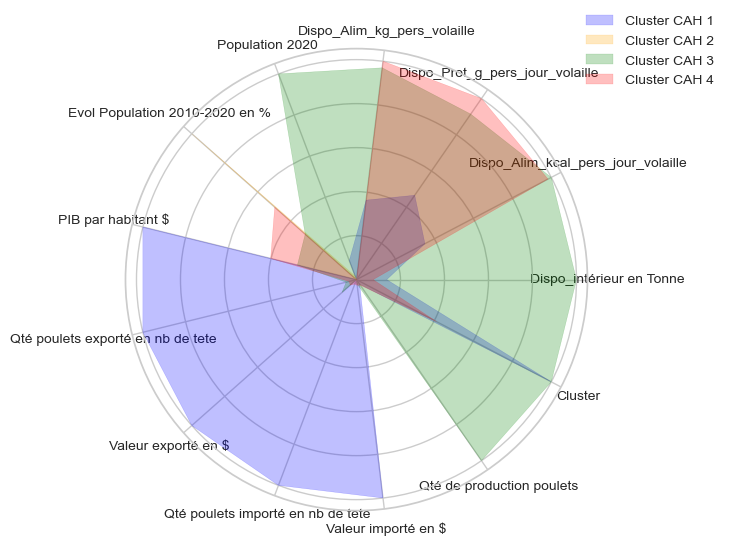

In [18]:



# Je calcule la moyenne de chaque caractéristique pour chaque cluster CAH
moyennes_clusters_cah = donnees_originale.groupby('Cluster_CAH').mean()
# Créer un nouveau DataFrame sans la colonne 'Cluster_kmean'
moyennes_clusters_cah_modifie = moyennes_clusters_cah.drop(columns=['Cluster_KMeans'])

# En supposant que MinMaxScaler ait déjà été importé,
# Je crée une instance de la classe MinMaxScaler pour normaliser les données
normalisateur = MinMaxScaler()

# Je normalise les moyennes des clusters du CAH
moyennes_clusters_cah_normalisees = normalisateur.fit_transform(moyennes_clusters_cah_modifie)
moyennes_clusters_cah_normalisees_df = pd.DataFrame(moyennes_clusters_cah_normalisees, columns=moyennes_clusters_cah_modifie.columns)


# Je récupère les noms des colonnes pour les utiliser comme étiquettes sur le graphique radar
etiquettes = moyennes_clusters_cah_modifie.columns.tolist()

# Je calcule le nombre de variables à utiliser dans le graphique radar
nombre_variables = len(etiquettes)

# Je génère les angles nécessaires pour chacune des variables du graphique radar
angles = np.linspace(0, 2 * np.pi, nombre_variables, endpoint=False).tolist()
angles += angles[:1]  # Pour fermer le cercle

# Je définis une palette de couleurs pour les différents clusters CAH
palette_couleurs = ["blue", "orange", "green", "red", "yellow"]

# Je crée la figure et l'axe pour le graphique radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Je parcours chaque cluster CAH et je le trace sur le graphique radar
for i in range(len(moyennes_clusters_cah_normalisees_df)):
    valeurs = moyennes_clusters_cah_normalisees_df.iloc[i].tolist()
    valeurs += valeurs[:1]  # Pour fermer le cercle
    ax.fill(angles, valeurs, color=palette_couleurs[i], alpha=0.25, label=f'Cluster CAH {i+1}')

# Je personnalise le graphique radar
ax.set_yticklabels([])  # Je supprime les étiquettes de l'axe des y
ax.set_xticks(angles[:-1])  # Je définis les positions des étiquettes de l'axe des x
ax.set_xticklabels(etiquettes)  # Je définis les étiquettes de l'axe des x
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))  # Je rajoute une légende

# Je montre le graphique radar
plt.show()


Comparaison methode de segmentation + metrique

In [19]:
# Importation des bibliothèques nécessaires
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import numpy as np

# Initialisation des modèles de clustering
modeles_clustering = {
    'KMeans': KMeans(n_clusters=4, n_init=10, random_state=42),
    'CAH': AgglomerativeClustering(n_clusters=4),
}

# Stockage des résultats dans une liste
resultats = []

# Parcours des modèles et calcul des indices de qualité
for nom_modele, modele in modeles_clustering.items():
    etiquettes = modele.fit_predict(donnees_standardise)
    
    silhouette = silhouette_score(donnees_standardise, etiquettes)
    davies = davies_bouldin_score(donnees_standardise, etiquettes)
    calinski = calinski_harabasz_score(donnees_standardise, etiquettes)
    
    resultats.append([nom_modele, silhouette, davies, calinski])

# Conversion des résultats en DataFrame pour un affichage agréable
colonnes = ['Modèle', 'Coefficient de Silhouette', 'Indice de Davies-Bouldin', 'Indice de Calinski-Harabasz']
df_resultats = pd.DataFrame(resultats, columns=colonnes)

# Affichage du DataFrame
display(df_resultats)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Modèle  Coefficient de Silhouette  Indice de Davies-Bouldin  \
0  KMeans                   0.379402                  1.028768   
1     CAH                   0.344604                  1.090547   

   Indice de Calinski-Harabasz  
0                    62.980934  
1                    56.658498

Calcul des moyenne pour chaque cluster

In [20]:
# Calcul des moyennes des variables pour chaque cluster K-means
moyenne_v_cluster = df_kmeans.groupby('Cluster').mean()

# Affichage du résumé statistique des clusters de manière plus stylisée
with pd.option_context('display.multi_sparse', False):
    print(moyenne_v_cluster.transpose())


Cluster                                    0         1         2         3
Dispo_intérieur en Tonne           -1.339140  1.051034  7.966512  3.288060
Dispo_Alim_kcal_pers_jour_volaille  0.667353 -1.070266  8.286123 -2.325124
Dispo_Prot_g_pers_jour_volaille     0.177407 -0.676482 -0.595574  5.842882
Dispo_Alim_kg_pers_volaille         0.142599 -0.240327  0.552400  0.376012
Population 2020                    -0.019990  0.026085 -0.409544  0.239332
Evol Population 2010-2020 en %     -0.128841  0.137568  0.017254  0.321234
PIB par habitant $                  0.008115 -0.018207 -0.310588  0.281885
Qté poulets exporté en nb de tete  -0.072417  0.084695  0.338060 -0.106401
Valeur exporté en $                -0.012347  0.013162  0.024304  0.017461
Qté poulets importé en nb de tete   0.001877 -0.000917 -0.013306 -0.010109
Valeur importé en $                -0.010440  0.003640  0.105222  0.055320
Qté de production poulets           0.002943 -0.005127  0.010896  0.010107


Utilisation des données cluster du KMEANS ajouter aux données orgininal 

In [21]:
# Assurer que les DataFrames ont le même nombre de lignes et sont dans le même ordre
if len(donnees_originale) == len(df_kmeans):
    donnees_originale['Cluster'] = df_kmeans['Cluster'].values

else:
    print("Les DataFrames n'ont pas la même taille, une correspondance directe n'est pas possible.")


Selection des pays en fonction de la consommation annuel de volaille et PIB par habitant

In [22]:
# Je sélectionne les colonnes d'intérêt
donnees_triees_df = donnees_originale[['Zone', 'Cluster','Dispo_Alim_kg_pers_volaille', 'PIB par habitant $']]

# Je trie les données par groupe, PIB par habitant et consommation de volaille
donnees_triees_df = donnees_triees_df.sort_values(by=['Cluster','PIB par habitant $', 'Dispo_Alim_kg_pers_volaille'], ascending=[True, False, False])

# Je sélectionne les 3 meilleurs pays pour chaque groupe
top_3_pays_par_groupe = donnees_triees_df.groupby('Cluster').head(3)

# Je montre les 3 pays sélectionnés pour chaque groupe
for etiquette_groupe in top_3_pays_par_groupe['Cluster'].unique():
    display(top_3_pays_par_groupe[top_3_pays_par_groupe['Cluster'] == etiquette_groupe])




Zone  Cluster  Dispo_Alim_kg_pers_volaille  \
114          Singapour        0                       10.598   
90                Oman        0                       19.660   
112  Sahara occidental        0                       24.460   

     PIB par habitant $  
114        54514.104390  
90         16131.861315  
112        10350.623907

Zone  Cluster  Dispo_Alim_kg_pers_volaille  PIB par habitant $
68   Luxembourg        1                        18.09        99218.376759
121      Suisse        1                        16.89        85389.352840
56      Irlande        1                        24.72        75456.393740

Zone  Cluster  Dispo_Alim_kg_pers_volaille  PIB par habitant $
98   Pays-Bas        2                         9.99        51330.522987
3   Allemagne        2                        18.34        47365.644042
12   Belgique        2                        12.44        45658.539921

Zone  Cluster  Dispo_Alim_kg_pers_volaille  \
144  États-Unis d'Amérique        3                       58.690   
25                   Chine        3                       39.425   
16                  Brésil        3                       48.390   

     PIB par habitant $  
144        63303.834620  
25         32985.574125  
16          6722.291569

In [23]:
import plotly.express as px

# Je crée un graphique à barres pour chaque groupe en utilisant Plotly
for etiquette_groupe, groupe in top_3_pays_par_groupe.groupby('Cluster'):
    # Je formate les valeurs du PIB par habitant pour inclure le symbole du dollar
    groupe['PIB_texte'] = groupe['PIB par habitant $'].apply(lambda x: f'{int(x):,} $')

    # Je crée le graphique
    fig = px.bar(groupe,
                 x='Zone',
                 y='Dispo_Alim_kg_pers_volaille',
                 color='Dispo_Alim_kg_pers_volaille',
                 title=f"Groupe {etiquette_groupe}: Top 3 des pays en consommation de poulet et PIB par habitant",
                 hover_data=['PIB par habitant $'],
                 text='PIB_texte',  # Je fais usage de la colonne formatée pour les étiquettes de texte
                 labels={'Dispo_Alim_kg_pers_volaille': 'Consommation de poulet (kg par personne par an)', 'Zone': 'Pays'},
                 height=600,
                 width=800,
                 color_continuous_scale=['blue', 'red']  # Je définis le dégradé de couleur
                 )
    # Je mets à jour le texte sur les barres
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    # Je mets à jour le fond pour qu'il soit blanc
    fig.update_layout(paper_bgcolor='white', plot_bgcolor='white')
    # Je montre le graphique
    fig.show()



In [24]:
# Je sélectionne les colonnes qui me sont utiles
pays_choisis_df = donnees_originale[['Zone', 'Cluster', 'Evol Population 2010-2020 en %', 'PIB par habitant $']]

# Je trie le DataFrame par 'Groupe', puis par 'PIB_par_habitant' et enfin par 'Evol_Population_2010_2020_pourcent', en ordre décroissant pour les deux dernières colonnes
pays_choisis_df = pays_choisis_df.sort_values(by=['Cluster', 'PIB par habitant $', 'Evol Population 2010-2020 en %'], ascending=[True, False, False])

# Je récupère les 3 premiers pays de chaque groupe en fonction du tri précédent
top_3_pays_par_groupe = pays_choisis_df.groupby('Cluster').head(3)

# J'affiche les 3 pays sélectionnés pour chaque groupe
for etiquette_groupe in top_3_pays_par_groupe['Cluster'].unique():
    display(top_3_pays_par_groupe[top_3_pays_par_groupe['Cluster'] == etiquette_groupe])



Zone  Cluster  Evol Population 2010-2020 en %  \
114          Singapour        0                            14.5   
90                Oman        0                            57.7   
112  Sahara occidental        0                            34.5   

     PIB par habitant $  
114        54514.104390  
90         16131.861315  
112        10350.623907

Zone  Cluster  Evol Population 2010-2020 en %  PIB par habitant $
68   Luxembourg        1                            24.3        99218.376759
121      Suisse        1                            10.4        85389.352840
56      Irlande        1                             9.3        75456.393740

Zone  Cluster  Evol Population 2010-2020 en %  PIB par habitant $
98   Pays-Bas        2                             4.9        51330.522987
3   Allemagne        2                             2.5        47365.644042
12   Belgique        2                             6.3        45658.539921

Zone  Cluster  Evol Population 2010-2020 en %  \
144  États-Unis d'Amérique        3                           8.000   
25                   Chine        3                           8.875   
16                  Brésil        3                           8.600   

     PIB par habitant $  
144        63303.834620  
25         32985.574125  
16          6722.291569

In [25]:
import plotly.express as px

# Je crée un graphique à barres pour chaque groupe à l'aide de Plotly
for etiquette_groupe, groupe in top_3_pays_par_groupe.groupby('Cluster'):
    # Je formate les valeurs de l'évolution de la population pour inclure le symbole pourcent
    groupe['Evol_texte'] = groupe['Evol Population 2010-2020 en %'].apply(lambda x: f'{x}%')

    # Je génère le graphique
    fig = px.bar(groupe,
                 x='Zone',
                 y='PIB par habitant $',
                 color='PIB par habitant $',
                 title=f"Groupe {etiquette_groupe}: Top des pays ayant l'évolution de la population et un PIB par habitant élevé",
                 hover_data=['Evol Population 2010-2020 en %'],
                 text='Evol_texte',  # J'utilise la colonne formatée pour les étiquettes de texte
                 labels={'PIB par habitant $': 'PIB par habitant', 'Zone': 'Pays'},
                 height=600,
                 width=800,
                 color_continuous_scale=['blue', 'red']  # Je définis le dégradé de couleur
                 )

    # Je mets à jour le texte sur les barres pour qu'il apparaisse à l'extérieur
    fig.update_traces(texttemplate='%{text}', textposition='outside')

    # Je mets à jour le fond pour qu'il soit blanc
    fig.update_layout(paper_bgcolor='white', plot_bgcolor='white')

    # Je montre le graphique
    fig.show()


Récuperation de coordonnée des pays

In [26]:
from geopy.geocoders import Nominatim

# Je crée une instance de la classe Nominatim pour utiliser son service de géocodage.
geolocator = Nominatim(user_agent="geoapiExercises")

# Je définis une fonction pour obtenir les coordonnées géographiques d'un pays.
def get_coordinates(country):
    try:
        location = geolocator.geocode(country)
        return (location.latitude, location.longitude)
    except:
        return (None, None)

# J'ajoute les coordonnées géographiques à mon DataFrame.
donnees_originale['Latitude'], donnees_originale['Longitude'] = zip(*donnees_originale['Zone'].apply(get_coordinates))

# Je remplace les valeurs manquantes par zéro, au cas où le géocodage échouerait pour certains pays.
donnees_originale['Latitude'].fillna(0, inplace=True)
donnees_originale['Longitude'].fillna(0, inplace=True)


Affichage de la carte des clusters

In [27]:
import folium
from geopy.distance import distance

# Je crée une carte centrée sur la France. Je désactive le zoom et le défilement pour faciliter la visualisation.
carte = folium.Map(location=[ 48.86131,2.34054], zoom_start=2, dragging=False, scrollWheelZoom=False)

# J'établis une liste de couleurs pour chaque cluster.
colors = ['red', 'green', 'blue','purple']

# Je définis les coordonnées de la France.
france_coordinates = (48.86131,2.34054)

# J'ajoute une colonne 'Distance' au DataFrame. Cette colonne contient la distance de chaque pays à la France.
donnees_originale['Distance'] = donnees_originale.apply(lambda row: distance(france_coordinates, (row['Latitude'], row['Longitude'])).km, axis=1)

# Je définis la taille des cercles qui représenteront chaque pays sur la carte.
circle_radius = 5  

# Pour chaque pays, j'ajoute un marqueur sur la carte. Le texte affiché dans le pop-up du marqueur dépend du pays.
for idx, row in donnees_originale.iterrows():
    if row['Zone'] == 'France':
        popup_text = f"<b>{row['Zone']}</b><br>" \
                     f"Pays d'exportation de poulet<br>"\
                     f"Cluster: {int(row['Cluster'])}<br>" \
                     f"Distance:{int(row['Distance'])} km<br>" \
                     f"Disponibilité intérieur(T):{int(row['Dispo_intérieur en Tonne'])}<br>"\
                     f"PIB par habitant en $:{int(row['PIB par habitant $'])}<br>"\
                     f"Population en 2020:{int(row['Population 2020'])}<br>"\
                     f"Quantité de poulets importés:{row['Qté poulets importé en nb de tete']}<br>"\
                     f"Quantité de poulets exportés:{row['Qté poulets exporté en nb de tete']}<br>"\
                     f"Consommation de volaille par an en Kg:{row['Dispo_Alim_kg_pers_volaille']}<br>"

    else:
        popup_text = f"<b>{row['Zone']}</b><br>" \
                     f"Cluster: {int(row['Cluster'])}<br>" \
                     f"Distance:{int(row['Distance'])} km de Paris<br>" \
                     f"Disponibilité intérieur(T):{int(row['Dispo_intérieur en Tonne'])}<br>"\
                     f"PIB par habitant en $:{int(row['PIB par habitant $'])}<br>"\
                     f"Population en 2020:{int(row['Population 2020'])}<br>"\
                     f"Quantité de poulets importés:{row['Qté poulets importé en nb de tete']}<br>"\
                     f"Quantité de poulets exportés:{row['Qté poulets exporté en nb de tete']}<br>"\
                     f"Consommation de volaille par an en Kg:{row['Dispo_Alim_kg_pers_volaille']}<br>"



    # Je définis la couleur du marqueur en fonction du cluster du pays.
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=circle_radius,
        color=colors[row['Cluster']],
        fill=True,
        fill_color=colors[row['Cluster']],
        fill_opacity=0.7,
        popup=folium.Popup(popup_text, max_width=300, max_height=250),
    ).add_to(carte)

# Pour chaque pays (sauf la France), j'ajoute une ligne entre la France et ce pays.
for idx, row in donnees_originale.iterrows():
    if row['Zone'] != 'France':
        folium.PolyLine(
            locations=[[row['Latitude'], row['Longitude']], france_coordinates],
            color='gray',
            opacity=0.5,
            weight=1.5
        ).add_to(carte)

# J'ajoute des légendes pour les clusters sur la carte.
legend_html = """
    <div style="position: fixed;
                top: 50px; right: 50px; width: 90px; height: 140px;
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color:white;
                opacity: 0.8;
                ">
    <p style="margin: 5px;"><b>Légendes</b></p>
    <p style="margin: 5px;"><span style='color:red;'>Cluster 0</span></p>
    <p style="margin: 5px;"><span style='color:green;'>Cluster 1</span></p>
    <p style="margin: 5px;"><span style='color:blue;'>Cluster 2</span></p>
    <p style="margin: 5px;"><span style='color:purple;'>Cluster 3</span></p>
    </div>
    """
carte.get_root().html.add_child(folium.Element(legend_html))

# J'ajuste la vue de la carte pour qu'elle englobe tous les éléments ajoutés.
carte.fit_bounds(carte.get_bounds())
# Je sauvegarde la carte
carte.save("carte_mondiale_clusters.html")
# Enfin, j'affiche la carte.
carte
